In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
import pandas as pd
import shapefile as shp
import seaborn as sns
import numpy as np




#reading the shapefile
shap = gpd.read_file('Shapes/district.shp')



In [ ]:
df_all = pd.read_csv('df_all.csv')
rent_smart = pd.read_csv("datasets/rent_smart.csv")


In [ ]:
#dropping the rows that don't have Housing complaints as a vaiolation type

rent_smart_filtered = rent_smart[rent_smart['violation_type'] == 'Housing Complaints']

#replacing from df_all to rent_smart 

all_copy = rent_smart_filtered.copy()

all_copy

date      violation_type  \
68      2022-10-26T16:57:00  Housing Complaints   
71      2022-10-26T15:27:00  Housing Complaints   
72      2022-10-26T15:17:00  Housing Complaints   
75      2022-10-26T15:08:00  Housing Complaints   
76      2022-10-26T15:00:00  Housing Complaints   
...                     ...                 ...   
309071  2017-11-24T09:46:00  Housing Complaints   
309078  2017-11-24T08:05:00  Housing Complaints   
309104  2017-11-23T13:36:00  Housing Complaints   
309105  2017-11-23T11:36:00  Housing Complaints   
309106  2017-11-23T11:34:50  Housing Complaints   

                                description                       address  \
68      Maintenance Complaint - Residential      15 Codman Park #6, 02119   
71           Heat - Excessive, Insufficient      18 Livingstone St, 02124   
72         Unsatisfactory Living Conditions     853 Cummins Hwy #2, 02126   
75         Unsatisfactory Living Conditions       812 Morton St #2, 02124   
76           Mice Infestation - Residential    183 Belgrade Ave #3, 02131   
...                                     ...                           ...   
309071                    Work w/out Permit        350 W Fourth St, 02127   
309078     Unsatisfactory Living Conditions      223 London St # 1, 02128   
309104       Heat - Excessive, Insufficient  370 Chestnut Hill Ave, 02135   
309105     Protection of Adjoining Property        38 Lexington St, 02128   
309106     Protection of Adjoining Property        38 Lexington St, 02128   

        neighborhood  zip_code      parcel  \
68           Roxbury      2119  1101907000   
71        Dorchester      2124  1403324000   
72          Mattapan      2126  1801753000   
75        Dorchester      2124  1403433000   
76        Roslindale      2131  2001360000   
...              ...       ...         ...   
309071  South Boston      2127   600516000   
309078   East Boston      2128   106181000   
309104      Brighton      2135  2102352000   
309105   East Boston      2128   102620000   
309106   East Boston      2128   102620000   

                                     owner  year built  year remodeled  \
68                            GALCAR-C LLC      1920.0          1980.0   
71                           THOMAS FRESCO      1935.0             NaN   
72                              MARTIN IAN      1910.0             NaN   
75                         OSBORNE LEROY J      1905.0             NaN   
76      ONE-83 BELGRADE AVE LLC A MASS LLC      1960.0          1988.0   
...                                    ...         ...             ...   
309071                 BIGELOW SQ CONDO TR      1999.0          1999.0   
309078          STAR PROPERTY HOLDINGS LLC      1900.0          2018.0   
309104            RESERVOIR PLACE CONDO TR      1999.0          1999.0   
309105                      HAWLEY MARIE E      1880.0             NaN   
309106                      HAWLEY MARIE E      1880.0             NaN   

                       property_type   latitude  longitude  
68      Residential 4 or more family  42.320030 -71.093250  
71              Residential 3-family  42.285230 -71.089530  
72              Residential 3-family  42.268800 -71.096350  
75              Residential 3-family  42.282180 -71.087430  
76       Residential 7 or more units  42.286420 -71.138210  
...                              ...        ...        ...  
309071             Condominium Main*  42.337490 -71.050200  
309078          Residential 3-family  42.375685 -71.036033  
309104             Condominium Main*  42.336651 -71.151138  
309105          Residential 1-family  42.377487 -71.038439  
309106          Residential 1-family  42.377487 -71.038439  

[54230 rows x 13 columns]

<AxesSubplot: >

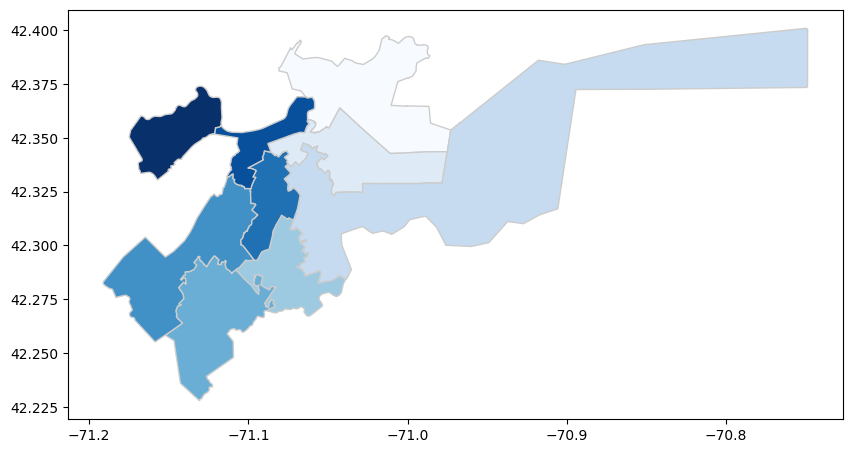

In [ ]:
fig, ax = plt.subplots(figsize = (10,10))
shap.plot(ax = ax, cmap = 'Blues', edgecolor='0.8')

In [ ]:
geometry = [Point(xy) for xy in zip(all_copy['longitude'], all_copy['latitude'])]

#shap.plot(ax = ax, cmap = 'BuGn', edgecolor='0.8')

crs = {'init': 'epsg:4326'}

geo_all= gpd.GeoDataFrame(all_copy, crs= crs,  geometry = geometry)

print("done")

done


C:\Users\SUEDA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [ ]:
#isolating shapes by districts

shape_1 = shap.loc[shap['LONGNAME']=='District 1']
shape_2 = shap.loc[shap['LONGNAME']=='District 2']
shape_3 = shap.loc[shap['LONGNAME']=='District 3']
shape_4 = shap.loc[shap['LONGNAME']=='District 4']
shape_5 = shap.loc[shap['LONGNAME']=='District 5']
shape_6 = shap.loc[shap['LONGNAME']=='District 6']
shape_7 = shap.loc[shap['LONGNAME']=='District 7']
shape_8 = shap.loc[shap['LONGNAME']=='District 8']
shape_9 = shap.loc[shap['LONGNAME']=='District 9']

In [ ]:
#all_districts = gpd.GeoDataFrame(df_all, crs= crs, geometry = geometry)

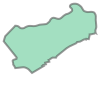

In [ ]:
#isolating district polygons


shape_1_poly = shape_1.iloc[0]['geometry']
shape_2_poly = shape_2.iloc[0]['geometry']
shape_3_poly = shape_3.iloc[0]['geometry']
shape_4_poly = shape_4.iloc[0]['geometry']
shape_5_poly = shape_5.iloc[0]['geometry']
shape_6_poly = shape_6.iloc[0]['geometry']
shape_7_poly = shape_7.iloc[0]['geometry']
shape_8_poly = shape_8.iloc[0]['geometry']
shape_9_poly = shape_9.iloc[0]['geometry']




shape_9_poly

In [ ]:
all_sorting = all_copy.copy()

In [ ]:


geo_all['intersect district 1'] = geo_all.intersects(shape_1_poly)
geo_all['intersect district 2'] = geo_all.intersects(shape_2_poly)
geo_all['intersect district 3'] = geo_all.intersects(shape_3_poly)
geo_all['intersect district 4'] = geo_all.intersects(shape_4_poly)
geo_all['intersect district 5'] = geo_all.intersects(shape_5_poly)
geo_all['intersect district 6'] = geo_all.intersects(shape_6_poly)
geo_all['intersect district 7'] = geo_all.intersects(shape_7_poly)
geo_all['intersect district 8'] = geo_all.intersects(shape_8_poly)
geo_all['intersect district 9'] = geo_all.intersects(shape_9_poly)

geo_all

date      violation_type  \
68      2022-10-26T16:57:00  Housing Complaints   
71      2022-10-26T15:27:00  Housing Complaints   
72      2022-10-26T15:17:00  Housing Complaints   
75      2022-10-26T15:08:00  Housing Complaints   
76      2022-10-26T15:00:00  Housing Complaints   
...                     ...                 ...   
309071  2017-11-24T09:46:00  Housing Complaints   
309078  2017-11-24T08:05:00  Housing Complaints   
309104  2017-11-23T13:36:00  Housing Complaints   
309105  2017-11-23T11:36:00  Housing Complaints   
309106  2017-11-23T11:34:50  Housing Complaints   

                                description                       address  \
68      Maintenance Complaint - Residential      15 Codman Park #6, 02119   
71           Heat - Excessive, Insufficient      18 Livingstone St, 02124   
72         Unsatisfactory Living Conditions     853 Cummins Hwy #2, 02126   
75         Unsatisfactory Living Conditions       812 Morton St #2, 02124   
76           Mice Infestation - Residential    183 Belgrade Ave #3, 02131   
...                                     ...                           ...   
309071                    Work w/out Permit        350 W Fourth St, 02127   
309078     Unsatisfactory Living Conditions      223 London St # 1, 02128   
309104       Heat - Excessive, Insufficient  370 Chestnut Hill Ave, 02135   
309105     Protection of Adjoining Property        38 Lexington St, 02128   
309106     Protection of Adjoining Property        38 Lexington St, 02128   

        neighborhood  zip_code      parcel  \
68           Roxbury      2119  1101907000   
71        Dorchester      2124  1403324000   
72          Mattapan      2126  1801753000   
75        Dorchester      2124  1403433000   
76        Roslindale      2131  2001360000   
...              ...       ...         ...   
309071  South Boston      2127   600516000   
309078   East Boston      2128   106181000   
309104      Brighton      2135  2102352000   
309105   East Boston      2128   102620000   
309106   East Boston      2128   102620000   

                                     owner  year built  year remodeled  ...  \
68                            GALCAR-C LLC      1920.0          1980.0  ...   
71                           THOMAS FRESCO      1935.0             NaN  ...   
72                              MARTIN IAN      1910.0             NaN  ...   
75                         OSBORNE LEROY J      1905.0             NaN  ...   
76      ONE-83 BELGRADE AVE LLC A MASS LLC      1960.0          1988.0  ...   
...                                    ...         ...             ...  ...   
309071                 BIGELOW SQ CONDO TR      1999.0          1999.0  ...   
309078          STAR PROPERTY HOLDINGS LLC      1900.0          2018.0  ...   
309104            RESERVOIR PLACE CONDO TR      1999.0          1999.0  ...   
309105                      HAWLEY MARIE E      1880.0             NaN  ...   
309106                      HAWLEY MARIE E      1880.0             NaN  ...   

                          geometry  intersect district 1  \
68      POINT (-71.09325 42.32003)                 False   
71      POINT (-71.08953 42.28523)                 False   
72      POINT (-71.09635 42.26880)                 False   
75      POINT (-71.08743 42.28218)                 False   
76      POINT (-71.13821 42.28642)                 False   
...                            ...                   ...   
309071  POINT (-71.05020 42.33749)                 False   
309078  POINT (-71.03603 42.37568)                  True   
309104  POINT (-71.15114 42.33665)                 False   
309105  POINT (-71.03844 42.37749)                  True   
309106  POINT (-71.03844 42.37749)                  True   

        intersect district 2 intersect district 3  intersect district 4  \
68                     False                False                 False   
71                     False                False                  True   
72                     False         

In [ ]:
#Filtering out the points not enclosed in a certain district

geo_district_1_filtered = geo_all [geo_all['intersect district 1'] == True]
geo_exclude_district_1  = geo_all [geo_all['intersect district 1'] == False]

geo_district_2_filtered = geo_all [geo_all['intersect district 2'] == True]
geo_exclude_district_2  = geo_all [geo_all['intersect district 2'] == False]

geo_district_3_filtered = geo_all [geo_all['intersect district 3'] == True]
geo_exclude_district_3  = geo_all [geo_all['intersect district 3'] == False]

geo_district_4_filtered = geo_all [geo_all['intersect district 4'] == True]
geo_exclude_district_4  = geo_all [geo_all['intersect district 4'] == False]

geo_district_5_filtered = geo_all [geo_all['intersect district 5'] == True]
geo_exclude_district_5  = geo_all [geo_all['intersect district 5'] == False]

geo_district_6_filtered = geo_all [geo_all['intersect district 6'] == True]
geo_exclude_district_6  = geo_all [geo_all['intersect district 6'] == False]

geo_district_7_filtered = geo_all [geo_all['intersect district 7'] == True]
geo_exclude_district_7  = geo_all [geo_all['intersect district 7'] == False]

geo_district_8_filtered = geo_all [geo_all['intersect district 8'] == True]
geo_exclude_district_8  = geo_all [geo_all['intersect district 8'] == False]

geo_district_9_filtered = geo_all [geo_all['intersect district 9'] == True]
geo_exclude_district_9  = geo_all [geo_all['intersect district 9'] == False]





# District 1 Analysis

### violation descriptions

In [ ]:

top_10_type_violation_d1 = geo_district_1_filtered['description'].value_counts().nlargest(10)
top_10_type_violation_d1

Contractors Complaint               1092
Work w/out Permit                    980
Unsatisfactory Living Conditions     718
Unsafe Dangerous Conditions          537
Building Inspection Request          516
Working Beyond Hours                 507
Pest Infestation - Residential       444
Protection of Adjoining Property     282
Exceeding Terms of Permit            241
Electrical                           229
Name: description, dtype: int64

In [ ]:
#removing other violation descriptions
geo_district_1_filtered_1 = geo_district_1_filtered[geo_district_1_filtered['description'].isin(['Contractors Complaint', 'Work w/out Permit', 
                                                                                                 'Unsatisfactory Living Conditions', 'Unsafe Dangerous Conditions', 
                                                                                                 'Building Inspection Request', 'Working Beyond Hours', 
                                                                                                 'Pest Infestation - Residential', 'Protection of Adjoining Property', 
                                                                                                 'Exceeding Terms of Permit', 'Electrical'])]

<AxesSubplot: title={'center': 'Top 10 violation descriptions in District 1'}>

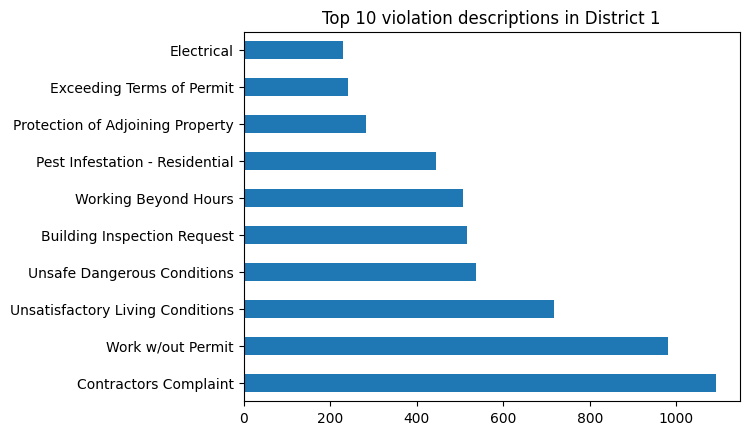

In [ ]:
top_10_type_violation_d1.plot(kind='barh', title = 'Top 10 violation descriptions in District 1')

C:\Users\SUEDA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<AxesSubplot: title={'center': 'Top 10 violation description types in District 1'}>

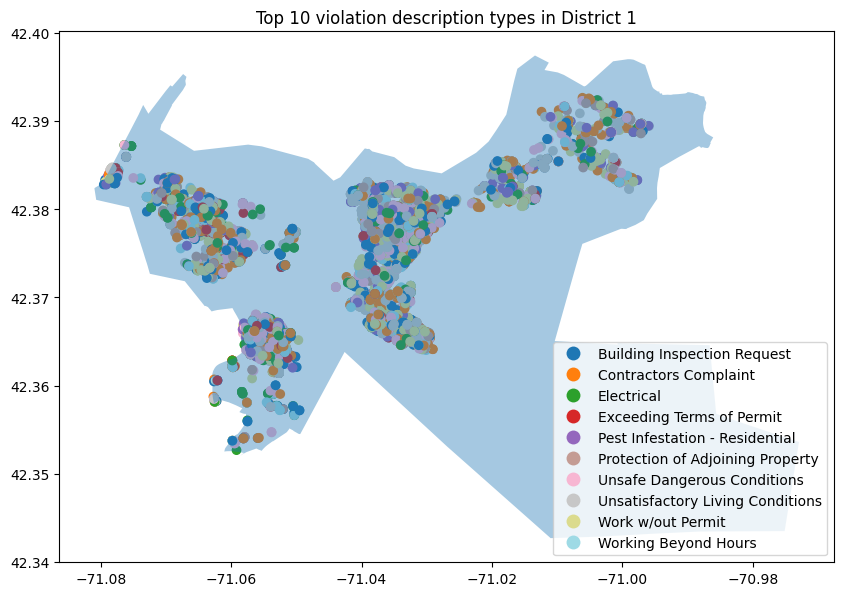

In [ ]:
#Plotting top 10 violation types 
geometry = [Point(xy) for xy in zip(geo_district_1_filtered_1['longitude'], geo_district_1_filtered_1['latitude'])]

crs = {'init': 'epsg:4326'}

geo_district_1 = gpd.GeoDataFrame(geo_district_1_filtered_1, crs= crs, geometry = geometry)

fig,ax = plt.subplots(figsize = (10,10))

ax.set_title('Top 10 violation description types in District 1')

geo_district_1.plot(ax = ax,column = 'description' , legend=True, cmap ='tab20' )

shape_1.plot(ax = ax,  alpha = 0.4)

### owner analysis

In [ ]:
top_10_type_owners_d1 = geo_district_1_filtered['owner'].value_counts().nlargest(10)
top_10_type_owners_d1

SOLSKINN PROPERTIES LLC              96
MERCANTILE WHARF ASSOCIATES          81
MCKINLEY INVESTMENT GROUP  LLC       73
EBSP ASSOCIATES LLC MASS LLC         50
PETER PAN PROPERTIES LLC MASS LLC    37
BULFINCH CROSSING PRIMARY            32
VILLA MICHAELANGELO INC              27
SHAUGHNESSY BRIAN F                  25
DAGOSTINO GRACE                      25
LAQUIDARA ROBERT                     24
Name: owner, dtype: int64

<AxesSubplot: title={'center': 'Top 10 violators in District 1'}>

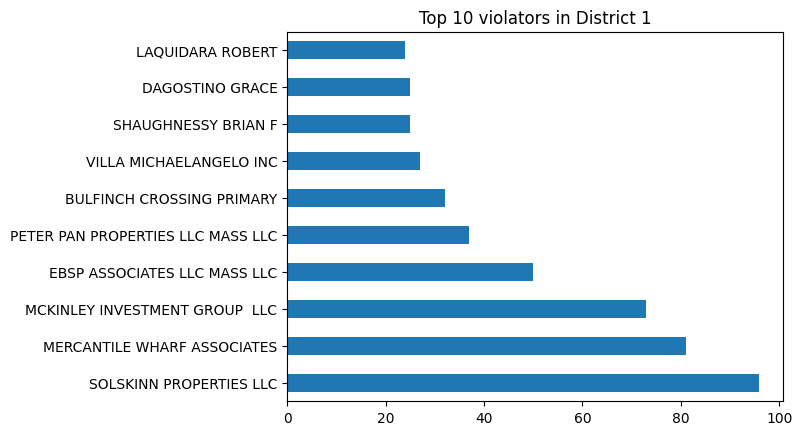

In [ ]:
top_10_type_owners_d1.plot(kind='barh', title = 'Top 10 violators in District 1')

In [ ]:
#filtering out other owners
geo_district_1_filtered_owners = geo_district_1_filtered[geo_district_1_filtered['owner'].isin(['SOLSKINN PROPERTIES LLC', 'MERCANTILE WHARF ASSOCIATES', 
                                                                                                'MCKINLEY INVESTMENT GROUP  LLC', 'EBSP ASSOCIATES LLC MASS LLC', 
                                                                                                'PETER PAN PROPERTIES LLC MASS LLC', 'BULFINCH CROSSING PRIMARY',
                                                                                                'VILLA MICHAELANGELO INC', 'DAGOSTINO GRACE', 
                                                                                                'SHAUGHNESSY BRIAN F','LAQUIDARA ROBERT'])]

C:\Users\SUEDA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<AxesSubplot: title={'center': 'Top 10 violators in District 1'}>

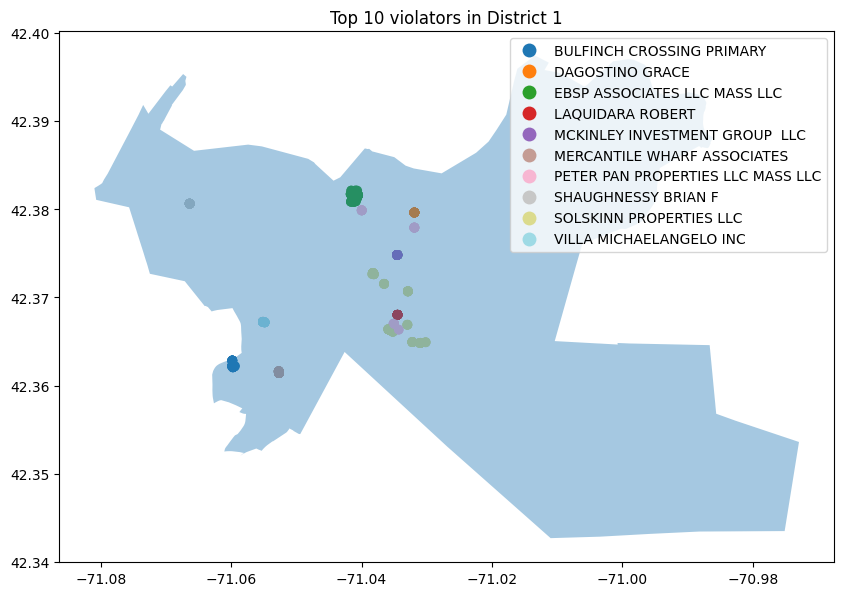

In [ ]:
#Plotting top 10 violators  
geometry = [Point(xy) for xy in zip(geo_district_1_filtered_owners['longitude'], geo_district_1_filtered_owners['latitude'])]

crs = {'init': 'epsg:4326'}

geo_district_1_own = gpd.GeoDataFrame(geo_district_1_filtered_owners, crs= crs, geometry = geometry)

fig,ax = plt.subplots(figsize = (10,10))

ax.set_title('Top 10 violators in District 1')

geo_district_1_own.plot(ax = ax,column = 'owner' , legend=True, cmap ='tab20' )

shape_1.plot(ax = ax,  alpha = 0.4)

### analysis of top 10 violators in other districts excluding district 1

In [ ]:
#isolating the top 5 violators 
geo_except_district_1_owners = geo_exclude_district_1[geo_exclude_district_1['owner'].isin(['SOLSKINN PROPERTIES LLC', 'MERCANTILE WHARF ASSOCIATES', 
                                                                                                'MCKINLEY INVESTMENT GROUP  LLC', 'EBSP ASSOCIATES LLC MASS LLC', 
                                                                                                'PETER PAN PROPERTIES LLC MASS LLC'])]

geo_except_district_1_owners

date      violation_type                  description  \
120070  2020-12-10T16:14:00  Housing Complaints  Building Inspection Request   
196268  2019-09-05T15:37:00  Housing Complaints                 Overcrowding   
196269  2019-09-05T15:33:00  Housing Complaints        Chronic Dampness/Mold   

                       address neighborhood  zip_code      parcel  \
120070  67 Dakota St #3, 02124   Dorchester      2124  1702342000   
196268  67 Dakota St #2, 02124   Dorchester      2124  1702342000   
196269  67 Dakota St #3, 02124   Dorchester      2124  1702342000   

                                 owner  year built  year remodeled  ...  \
120070  MCKINLEY INVESTMENT GROUP  LLC      1905.0          2015.0  ...   
196268  MCKINLEY INVESTMENT GROUP  LLC      1905.0          2015.0  ...   
196269  MCKINLEY INVESTMENT GROUP  LLC      1905.0          2015.0  ...   

                          geometry  intersect district 1  \
120070  POINT (-71.06995 42.29916)                 False   
196268  POINT (-71.06995 42.29916)                 False   
196269  POINT (-71.06995 42.29916)                 False   

        intersect district 2 intersect district 3  intersect district 4  \
120070                 False                False                  True   
196268                 False                False                  True   
196269                 False                False                  True   

        intersect district 5  intersect district 6  intersect district 7  \
120070                 False                 False                 False   
196268                 False                 False                 False   
196269                 False                 False                 False   

        intersect district 8  intersect district 9  
120070                 False                 False  
196268                 False                 False  
196269                 False                 False  

[3 rows x 23 columns]

In [ ]:
#violations of the top 5 owners from d1 in other districts
violation_excluding_d1 = geo_except_district_1_owners['description'].value_counts()
violation_excluding_d1


Chronic Dampness/Mold          1
Overcrowding                   1
Building Inspection Request    1
Name: description, dtype: int64

<AxesSubplot: title={'center': 'Violations in other districts from top D1 violators'}>

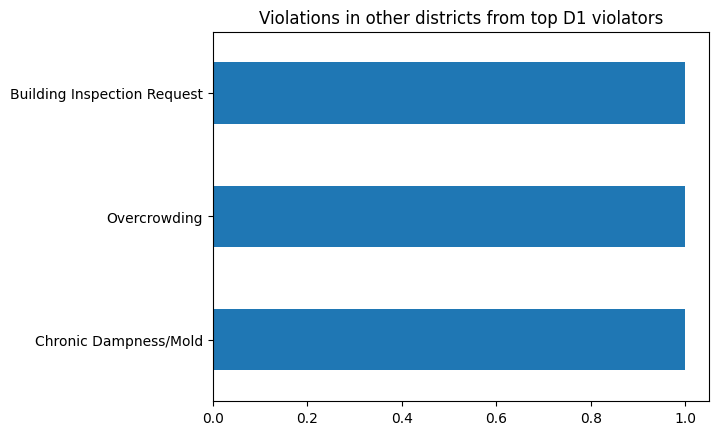

In [ ]:
violation_excluding_d1.plot(kind='barh', title = 'Violations in other districts from top D1 violators')

In [ ]:
violators_excluding_d1 = geo_except_district_1_owners['owner'].value_counts()
violators_excluding_d1
#top_10_type_owners_d1

MCKINLEY INVESTMENT GROUP  LLC    3
Name: owner, dtype: int64

<AxesSubplot: title={'center': '# of Violations in other districts from top D1 violators'}>

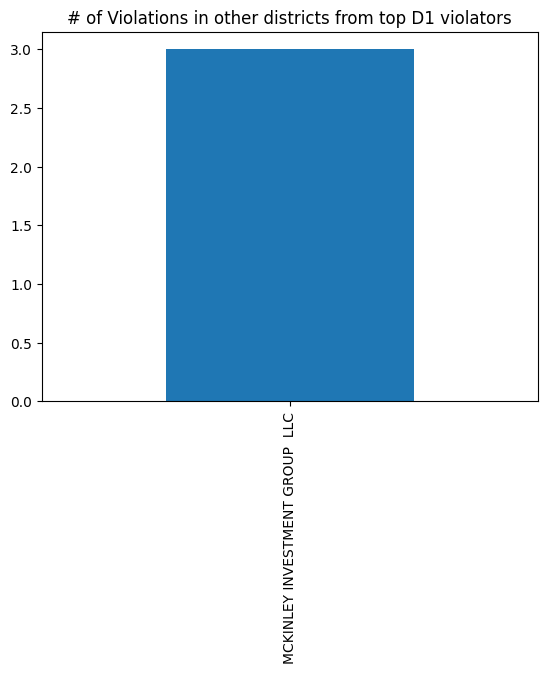

In [ ]:
violators_excluding_d1.plot(kind='bar', title = '# of Violations in other districts from top D1 violators')

C:\Users\SUEDA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<AxesSubplot: title={'center': 'Violations in other Districts from top District 1 violators '}>

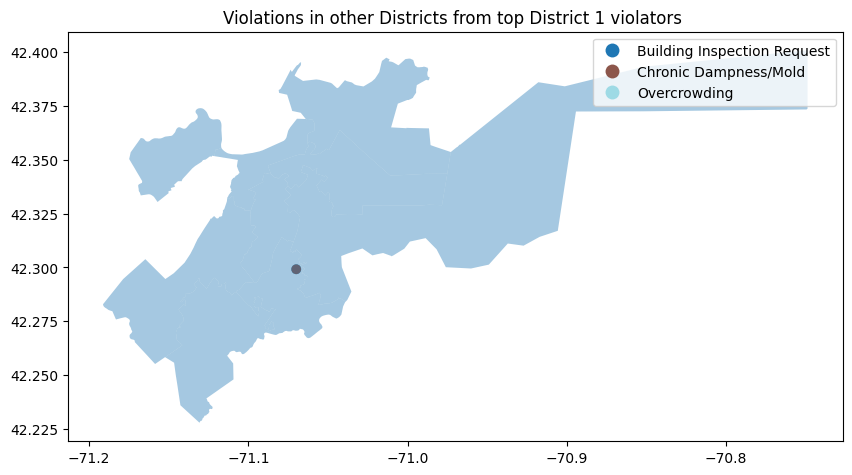

In [ ]:
#Plotting top 10 violation types 
geometry = [Point(xy) for xy in zip(geo_except_district_1_owners['longitude'], geo_except_district_1_owners['latitude'])]

crs = {'init': 'epsg:4326'}

geo_district_except_1 = gpd.GeoDataFrame(geo_except_district_1_owners, crs= crs, geometry = geometry)

fig,ax = plt.subplots(figsize = (10,10))

ax.set_title('Violations in other Districts from top District 1 violators ')

geo_district_except_1.plot(ax = ax,column = 'description' , legend=True, cmap ='tab20' )

shap.plot(ax = ax,  alpha = 0.4)

# District 2

### violations descriptions

In [ ]:
#violations in district 2
top_10_type_violation_d2 = geo_district_2_filtered['description'].value_counts().nlargest(10)

top_10_type_violation_d2

Work w/out Permit                   1101
Contractors Complaint               1067
Working Beyond Hours                 711
Unsafe Dangerous Conditions          515
Building Inspection Request          447
Unsatisfactory Living Conditions     414
Pest Infestation - Residential       403
Exceeding Terms of Permit            215
Protection of Adjoining Property     208
Electrical                           169
Name: description, dtype: int64

In [ ]:
#removing other violation descriptions
geo_district_2_filtered_violation = geo_district_2_filtered[geo_district_2_filtered['description'].isin(['Work w/out Permit', 'Contractors Complaint',
                                                                                                         'Working Beyond Hours', 'Unsafe Dangerous Conditions',
                                                                                                         'Building Inspection Request', 'Unsatisfactory Living Conditions', 
                                                                                                         'Pest Infestation - Residential', 'Exceeding Terms of Permit',
                                                                                                         'Protection of Adjoining Property', 'Electrical'])]


<AxesSubplot: title={'center': 'Top 10 violation descriptions in District 2'}>

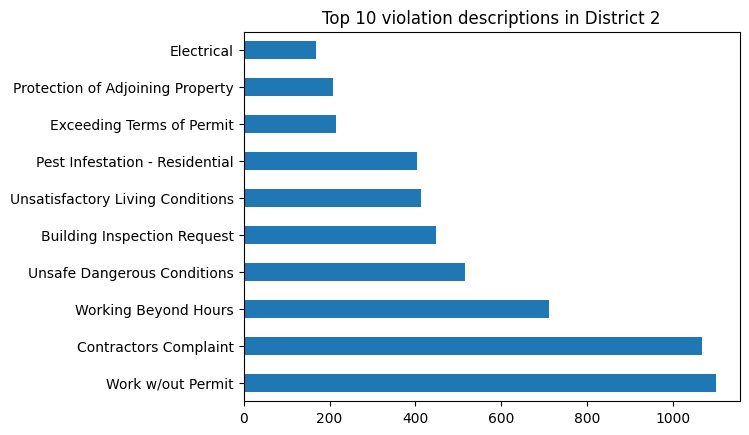

In [ ]:
top_10_type_violation_d2.plot(kind='barh', title = 'Top 10 violation descriptions in District 2')

C:\Users\SUEDA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<AxesSubplot: title={'center': 'Top 10 violation description types in District 2'}>

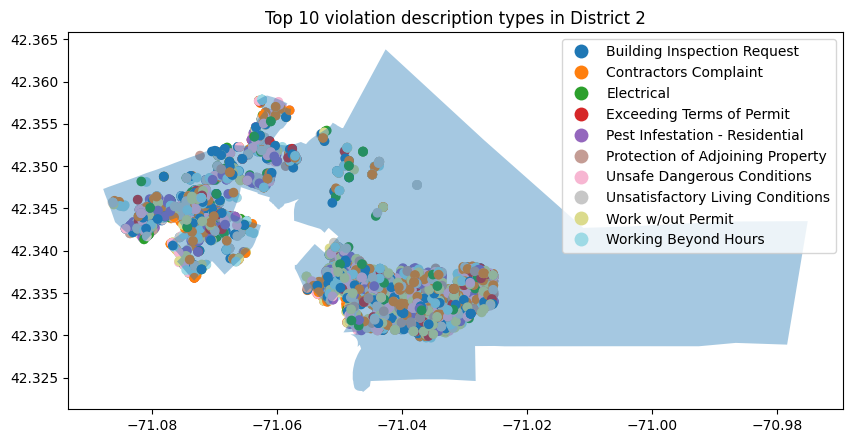

In [ ]:
#Plotting top 10 violation types 
geometry = [Point(xy) for xy in zip(geo_district_2_filtered_violation['longitude'], geo_district_2_filtered_violation['latitude'])]

crs = {'init': 'epsg:4326'}

geo_district_2 = gpd.GeoDataFrame(geo_district_2_filtered_violation, crs= crs, geometry = geometry)

fig,ax = plt.subplots(figsize = (10,10))

ax.set_title('Top 10 violation description types in District 2')

geo_district_2.plot(ax = ax,column = 'description' , legend=True, cmap ='tab20' )

shape_2.plot(ax = ax,  alpha = 0.4)

### owner analysis


In [ ]:
top_10_type_owners_d2 = geo_district_2_filtered['owner'].value_counts().nlargest(10)
top_10_type_owners_d2

RADCLIFFE RUSSELL F ETAL        53
CONNOLLY DIANE M                38
FOX STREET LLC                  37
SKG REALTY LLC                  33
VIVIENDAS LLC                   33
MAHONEY MARGARET F              29
ARTS YVONNE M TS                29
CSTO WINN OWNER LLC MASS LLC    28
399 CONGRESS LLC                27
MIGLIORI SCOTT                  26
Name: owner, dtype: int64

In [ ]:
#isolating the top violators
geo_district_2_filtered_owners = geo_district_2_filtered[geo_district_2_filtered['owner'].isin([
    'RADCLIFFE RUSSELL F ETAL', 'CONNOLLY DIANE M',
    'FOX STREET LLC', 'SKG REALTY LLC', 
    'VIVIENDAS LLC','MAHONEY MARGARET F',
    'ARTS YVONNE M TS' , 'CSTO WINN OWNER LLC MASS LLC',
    '399 CONGRESS LLC', 'MIGLIORI SCOTT'
])]


<AxesSubplot: title={'center': 'Top 10 violators in District 2'}>

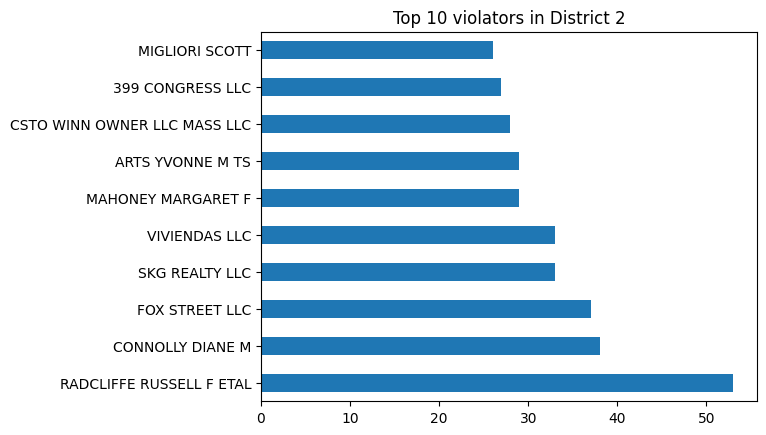

In [ ]:
top_10_type_owners_d2.plot(kind='barh', title = 'Top 10 violators in District 2')

C:\Users\SUEDA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<AxesSubplot: title={'center': 'Top 10 violators in District 2'}>

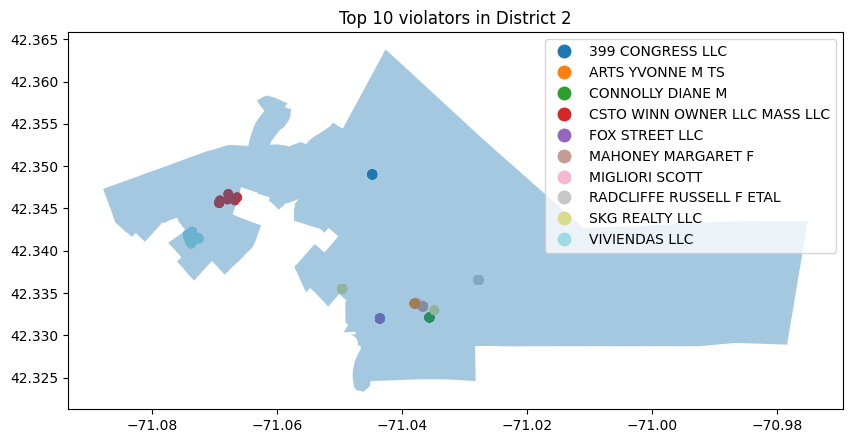

In [ ]:
#Plotting top 10 violators  
geometry = [Point(xy) for xy in zip(geo_district_2_filtered_owners['longitude'], geo_district_2_filtered_owners['latitude'])]

crs = {'init': 'epsg:4326'}

geo_district_2_own = gpd.GeoDataFrame(geo_district_2_filtered_owners, crs= crs, geometry = geometry)

fig,ax = plt.subplots(figsize = (10,10))

ax.set_title('Top 10 violators in District 2')

geo_district_2_own.plot(ax = ax,column = 'owner' , legend=True, cmap ='tab20' )

shape_2.plot(ax = ax,  alpha = 0.4)

### analysis of violations in other districts by the top 5 violators from district 2

In [ ]:
geo_except_district_2_owners = geo_exclude_district_2[geo_exclude_district_2['owner'].isin(['RADCLIFFE RUSSELL F ETAL', 'CONNOLLY DIANE M',
                                                                                            'FOX STREET LLC', 'SKG REALTY LLC', 
                                                                                            'VIVIENDAS LLC'])]


#geo_except_district_2_violations = geo_exclude_district_2[geo_exclude_district_2['description'].isin(['Contractors Complaint', 'Work w/out Permit', 
                                                                                                 #'Unsatisfactory Living Conditions', 'Unsafe Dangerous Conditions', 
                                                                                                 #'Building Inspection Request'])]
                                                          

geo_except_district_2_owners

Empty GeoDataFrame
Columns: [date, violation_type, description, address, neighborhood, zip_code, parcel, owner, year built, year remodeled, property_type, latitude, longitude, geometry, intersect district 1, intersect district 2, intersect district 3, intersect district 4, intersect district 5, intersect district 6, intersect district 7, intersect district 8, intersect district 9]
Index: []

[0 rows x 23 columns]

the owners do not have properties in other districts

# District 3
### violation descriptions

In [ ]:
top_10_type_violation_d3 = geo_district_3_filtered['description'].value_counts().nlargest(10)
top_10_type_violation_d3

Unsatisfactory Living Conditions    937
Work w/out Permit                   804
Pest Infestation - Residential      740
Contractors Complaint               554
Building Inspection Request         365
Unsafe Dangerous Conditions         348
Heat - Excessive, Insufficient      338
Working Beyond Hours                318
Mice Infestation - Residential      169
Electrical                          158
Name: description, dtype: int64

In [ ]:
#removing other descriptions
geo_district_3_filtered_violation = geo_district_3_filtered[geo_district_3_filtered['description'].isin([
    'Unsatisfactory Living Conditions', 'Work w/out Permit', 
    'Pest Infestation - Residential', 'Contractors Complaint', 
    'Building Inspection Request', 'Unsafe Dangerous Conditions', 
    'Heat - Excessive, Insufficient', 'Working Beyond Hours', 
    'Mice Infestation - Residential', 'Electrical'])]

<AxesSubplot: title={'center': 'Top 10 violation descriptions in District 3'}>

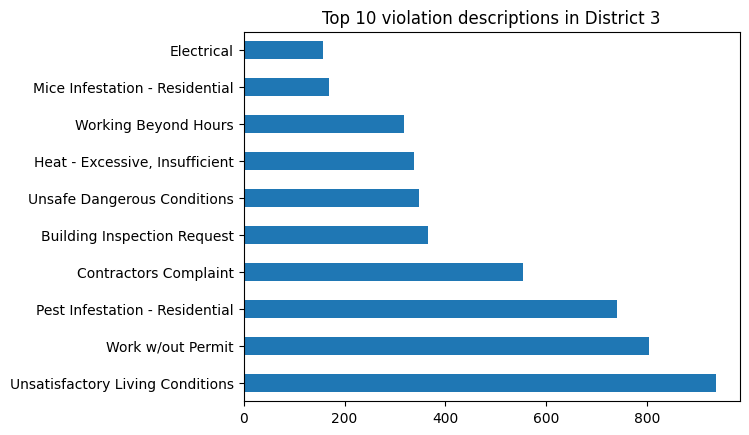

In [ ]:
top_10_type_violation_d3.plot(kind='barh', title = 'Top 10 violation descriptions in District 3')

C:\Users\SUEDA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<AxesSubplot: title={'center': 'Top 10 violation descriptions in District 3'}>

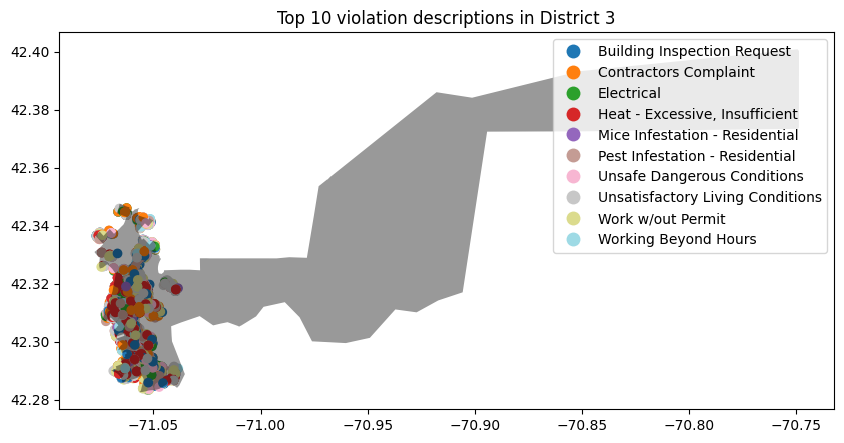

In [ ]:
geometry = [Point(xy) for xy in zip(geo_district_3_filtered_violation['longitude'], geo_district_3_filtered_violation['latitude'])]

crs = {'init': 'epsg:4326'}

geo_district_3 = gpd.GeoDataFrame(geo_district_3_filtered_violation, crs= crs, geometry = geometry)

fig,ax = plt.subplots(figsize = (10,10))

ax.set_title('Top 10 violation descriptions in District 3')

geo_district_3.plot(ax = ax ,column = 'description' , legend=True, cmap ='tab20')

shape_3.plot(ax = ax, alpha = 0.4, color = 'black')

### owner analysis

In [ ]:
top_10_type_owners_d3 = geo_district_3_filtered['owner'].value_counts().nlargest(10)
top_10_type_owners_d3 

HARBOR POINT APTS CO LESSEE       83
FLYNN KATHLEEN                    60
COMMUNITY DEVELOPMENT             50
COURT SQUARE PRESS BUILDING       44
BAKER THOMAS                      41
VICTORY EQUITY INVESTMENT  LLC    36
57-59 FRANKLIN 02145 LLC          33
MA YU KUN                         32
WALTON JEANETTE TS                32
INK BLOCK II PHASE 1 LLC          26
Name: owner, dtype: int64

In [ ]:
#removing other owners
geo_district_3_filtered_owners = geo_district_3_filtered[geo_district_3_filtered['owner'].isin([
    'HARBOR POINT APTS CO LESSEE', 'FLYNN KATHLEEN', 
    'COMMUNITY DEVELOPMENT', 'COURT SQUARE PRESS BUILDING',
    'BAKER THOMAS', 'VICTORY EQUITY INVESTMENT  LLC', 
    '57-59 FRANKLIN 02145 LLC', 'WALTON JEANETTE TS',
    'MA YU KUN', 'HOME RECONSTRUCTION LLC'])]

<AxesSubplot: title={'center': 'Top 10 violators in District 3'}>

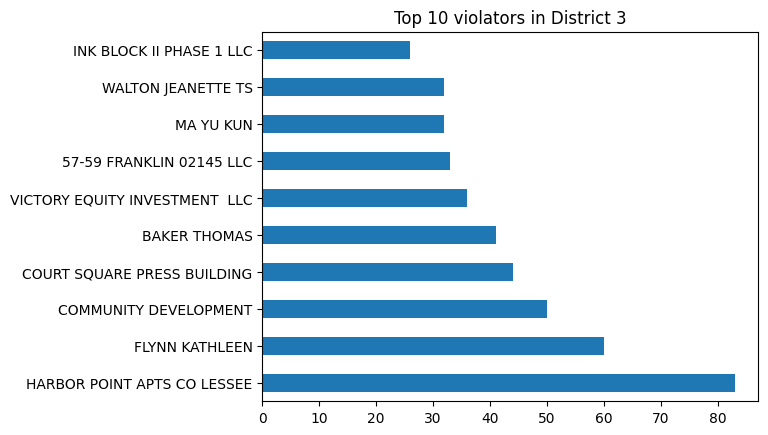

In [ ]:
top_10_type_owners_d3.plot(kind='barh', title = 'Top 10 violators in District 3')

C:\Users\SUEDA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<AxesSubplot: title={'center': 'Top 10 violators in District 3'}>

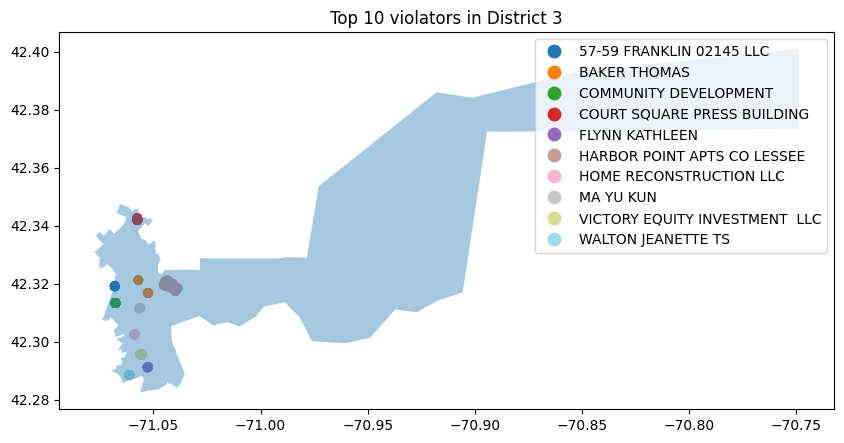

In [ ]:
#Plotting top 10 violators  
geometry = [Point(xy) for xy in zip(geo_district_3_filtered_owners['longitude'], geo_district_3_filtered_owners['latitude'])]

crs = {'init': 'epsg:4326'}

geo_district_3_own = gpd.GeoDataFrame(geo_district_3_filtered_owners, crs= crs, geometry = geometry)

fig,ax = plt.subplots(figsize = (10,10))

ax.set_title('Top 10 violators in District 3')

geo_district_3_own.plot(ax = ax,column = 'owner' , legend=True, cmap ='tab20' )

shape_3.plot(ax = ax,  alpha = 0.4)

### analysis of violations in other districts by the top 5 violators from district 3

In [ ]:
geo_except_district_3_owners = geo_exclude_district_3[geo_exclude_district_3['owner'].isin(['HARBOR POINT APTS CO LESSEE', 'FLYNN KATHLEEN', 
                                                                                            'COMMUNITY DEVELOPMENT', 'COURT SQUARE PRESS BUILDING',
                                                                                            'BAKER THOMAS'])]


#geo_except_district_2_violations = geo_exclude_district_2[geo_exclude_district_2['description'].isin(['Contractors Complaint', 'Work w/out Permit', 
                                                                                                 #'Unsatisfactory Living Conditions', 'Unsafe Dangerous Conditions', 
                                                                                                 #'Building Inspection Request'])]
                                                          

geo_except_district_3_owners

Empty GeoDataFrame
Columns: [date, violation_type, description, address, neighborhood, zip_code, parcel, owner, year built, year remodeled, property_type, latitude, longitude, geometry, intersect district 1, intersect district 2, intersect district 3, intersect district 4, intersect district 5, intersect district 6, intersect district 7, intersect district 8, intersect district 9]
Index: []

[0 rows x 23 columns]

The owners do not have properties in other districts 

# District 4

### violation descriptions

In [ ]:
#violations
top_10_type_violation_d4 = geo_district_4_filtered['description'].value_counts().nlargest(10)

top_10_type_violation_d4

Unsatisfactory Living Conditions       1923
Heat - Excessive, Insufficient          837
Work w/out Permit                       563
Pest Infestation - Residential          416
Building Inspection Request             415
Mice Infestation - Residential          335
Unsafe Dangerous Conditions             290
Contractors Complaint                   266
Electrical                              234
Maintenance Complaint - Residential     209
Name: description, dtype: int64

In [ ]:
#filtering out 
geo_district_4_filtered_violation = geo_district_4_filtered[geo_district_4_filtered['description'].isin(
    ['Unsatisfactory Living Conditions', 'Heat - Excessive, Insufficient',
     'Work w/out Permit', 'Pest Infestation - Residential',
     'Building Inspection Request', 'Mice Infestation - Residential',
     'Unsafe Dangerous Conditions','Contractors Complaint',
     'Electrical ','Maintenance Complaint - Residential'])]


<AxesSubplot: title={'center': 'Top 10 violation descriptions in District 4'}>

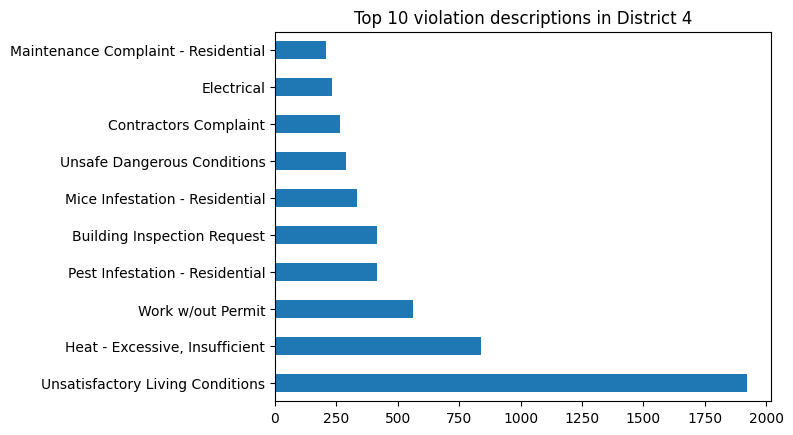

In [ ]:
top_10_type_violation_d4.plot(kind='barh', title = 'Top 10 violation descriptions in District 4')

C:\Users\SUEDA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<AxesSubplot: title={'center': 'Top 10 violation descriptions in District 4'}>

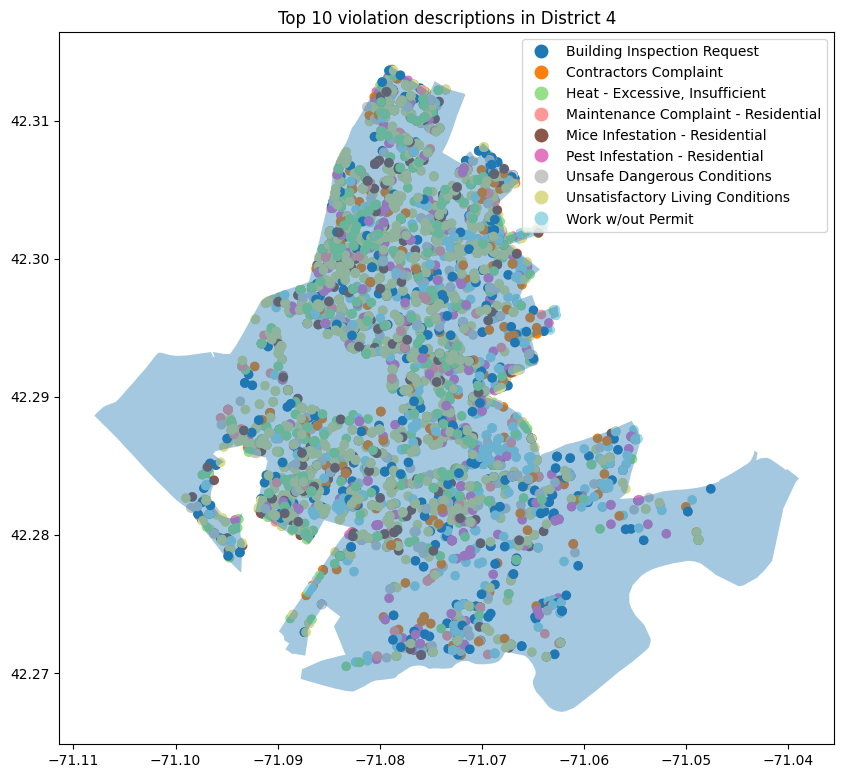

In [ ]:
geometry = [Point(xy) for xy in zip(geo_district_4_filtered_violation['longitude'], geo_district_4_filtered_violation['latitude'])]

crs = {'init': 'epsg:4326'}

geo_district_4 = gpd.GeoDataFrame(geo_district_4_filtered_violation, crs= crs, geometry = geometry)

fig,ax = plt.subplots(figsize = (10,10))

ax.set_title('Top 10 violation descriptions in District 4')

geo_district_4.plot(ax = ax ,column = 'description' , legend=True, cmap ='tab20')

shape_4.plot(ax = ax, alpha = 0.4)

 ### owner analysis

In [ ]:
top_10_type_owners_d4 = geo_district_4_filtered['owner'].value_counts().nlargest(10)
top_10_type_owners_d4 

WASHINGTON COLUMBIA II MASS LPS         80
TALBOT BERNARD HOUSING LLC MASS LLC     68
OGBEBOR UWA F                           58
WASHINGTON COLUMBIA LPS MASS LPS        55
JPNDC  PITTS  LLC                       51
GRANITE LENA PARK MASS LP               50
TRI CAPITAL DEVELOPMENT LLC MASS LLC    44
Q-G II HOUSING MASS LP                  40
GROVE HALL REDEVELOPER LLC MASS LLC     38
CESCO LLC MASS LLC                      37
Name: owner, dtype: int64

In [ ]:
#removing other owners
geo_district_4_filtered_owners = geo_district_4_filtered[geo_district_4_filtered['owner'].isin([
    'WASHINGTON COLUMBIA II MASS LPS', 'TALBOT BERNARD HOUSING LLC MASS LLC', 
    'OGBEBOR UWA F', 'WASHINGTON COLUMBIA LPS MASS LPS', 
    'JPNDC  PITTS  LLC', 'GRANITE LENA PARK MASS LP', 
    'TRI CAPITAL DEVELOPMENT LLC MASS LLC', 'Q-G II HOUSING MASS LP',
    'GROVE HALL REDEVELOPER LLC MASS LLC', 'CESCO LLC MASS LLC'])]

<AxesSubplot: title={'center': 'Top 10 violators in District 4'}>

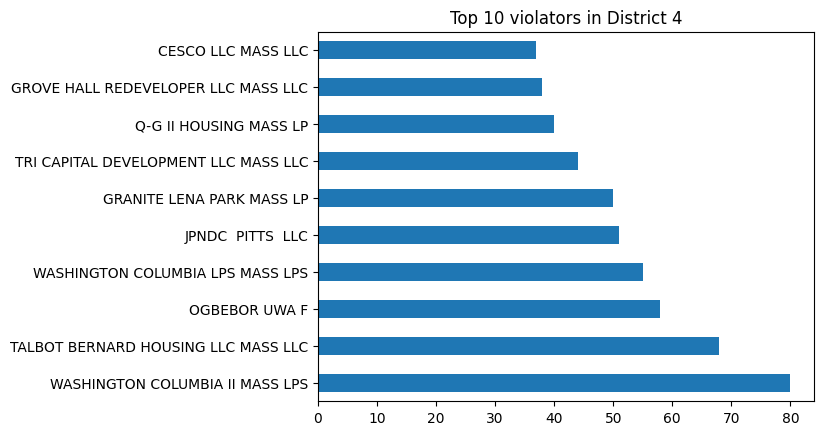

In [ ]:
top_10_type_owners_d4.plot(kind='barh', title = 'Top 10 violators in District 4')

C:\Users\SUEDA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<AxesSubplot: title={'center': 'Top 10 violators in District 4'}>

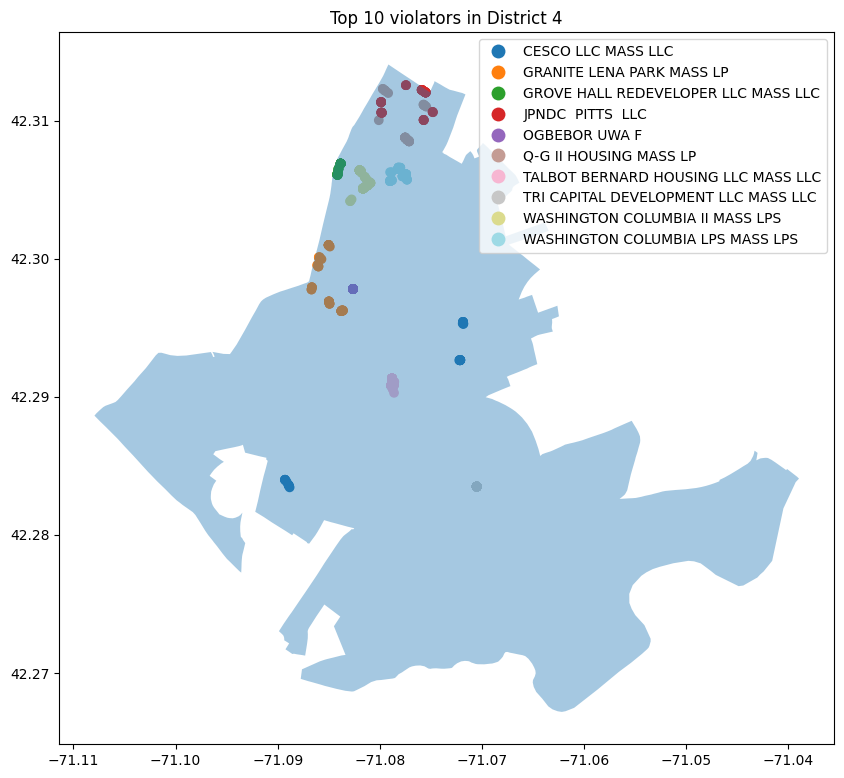

In [ ]:
#Plotting top 10 violators  
geometry = [Point(xy) for xy in zip(geo_district_4_filtered_owners['longitude'], geo_district_4_filtered_owners['latitude'])]

crs = {'init': 'epsg:4326'}

geo_district_4_own = gpd.GeoDataFrame(geo_district_4_filtered_owners, crs= crs, geometry = geometry)

fig,ax = plt.subplots(figsize = (10,10))

ax.set_title('Top 10 violators in District 4')

geo_district_4_own.plot(ax = ax,column = 'owner' , legend=True, cmap ='tab20' )

shape_4.plot(ax = ax,  alpha = 0.4)

### analysis of violations in other districts by the top 5 violators from district 4

In [ ]:
geo_except_district_4_owners = geo_exclude_district_4[geo_exclude_district_4['owner'].isin(['WASHINGTON COLUMBIA II MASS LPS', 'TALBOT BERNARD HOUSING LLC MASS LLC', 
                                                                                            'OGBEBOR UWA F', 'WASHINGTON COLUMBIA LPS MASS LPS', 
                                                                                            'JPNDC  PITTS  LLC'])]


#geo_except_district_2_violations = geo_exclude_district_2[geo_exclude_district_2['description'].isin(['Contractors Complaint', 'Work w/out Permit', 
                                                                                                 #'Unsatisfactory Living Conditions', 'Unsafe Dangerous Conditions', 
                                                                                                 #'Building Inspection Request'])]
                                                          

geo_except_district_4_owners

date      violation_type  \
7235    2022-09-26T15:46:00  Housing Complaints   
22675   2022-07-22T13:52:00  Housing Complaints   
26689   2022-06-23T08:57:00  Housing Complaints   
27878   2022-06-15T08:30:00  Housing Complaints   
28295   2022-06-13T10:47:00  Housing Complaints   
39238   2022-04-06T20:04:00  Housing Complaints   
41601   2022-03-22T15:05:00  Housing Complaints   
44083   2022-03-04T08:19:00  Housing Complaints   
44615   2022-03-01T10:03:00  Housing Complaints   
51527   2022-01-18T09:01:00  Housing Complaints   
64553   2021-10-24T10:10:00  Housing Complaints   
65172   2021-10-20T09:48:00  Housing Complaints   
69350   2021-09-29T11:51:00  Housing Complaints   
74063   2021-09-08T09:52:00  Housing Complaints   
77964   2021-08-30T15:11:00  Housing Complaints   
81144   2021-08-20T15:27:00  Housing Complaints   
83838   2021-08-09T10:15:14  Housing Complaints   
90649   2021-07-02T08:08:00  Housing Complaints   
90964   2021-06-30T13:13:00  Housing Complaints   
93124   2021-06-15T13:00:00  Housing Complaints   
102742  2021-04-12T11:38:00  Housing Complaints   
103037  2021-04-09T11:45:00  Housing Complaints   
127379  2020-10-20T08:31:17  Housing Complaints   
131951  2020-09-25T08:09:54  Housing Complaints   
150143  2020-07-07T11:37:00  Housing Complaints   
156224  2020-05-28T20:17:00  Housing Complaints   
167044  2020-02-19T08:50:32  Housing Complaints   
168377  2020-02-11T14:14:00  Housing Complaints   
168703  2020-02-10T08:09:49  Housing Complaints   
169128  2020-02-07T08:55:02  Housing Complaints   
169997  2020-02-03T08:39:00  Housing Complaints   
170348  2020-01-31T10:11:00  Housing Complaints   
170351  2020-01-31T10:04:06  Housing Complaints   
170352  2020-01-31T09:57:01  Housing Complaints   
170354  2020-01-31T09:47:16  Housing Complaints   
170930  2020-01-28T11:39:11  Housing Complaints   
174968  2020-01-06T12:51:00  Housing Complaints   
174969  2020-01-06T12:45:00  Housing Complaints   
175366  2020-01-02T15:28:00  Housing Complaints   
177618  2019-12-17T10:03:00  Housing Complaints   
177632  2019-12-17T08:46:00  Housing Complaints   
183676  2019-11-11T15:30:00  Housing Complaints   
203455  2019-08-09T11:01:52  Housing Complaints   
203459  2019-08-09T10:18:01  Housing Complaints   
204963  2019-08-01T13:15:00  Housing Complaints   
208923  2019-07-11T10:26:00  Housing Complaints   
213428  2019-06-14T10:56:00  Housing Complaints   
230862  2019-02-17T13:20:00  Housing Complaints   
243448  2018-11-24T02:23:00  Housing Complaints   
248676  2018-10-24T13:59:00  Housing Complaints   
269213  2018-07-10T17:48:00  Housing Complaints   
270328  2018-07-03T19:05:00  Housing Complaints   
275518  2018-06-06T14:39:41  Housing Complaints   
292809  2018-03-05T14:16:02  Housing Complaints   
297540  2018-02-06T13:37:00  Housing Complaints   

                                   description  \
7235          Unsatisfactory Living Conditions   
22675           Pest Infestation - Residential   
26689           Pest Infestation - Residential   
27878           Mice Infestation - Residential   
28295           Mice Infestation - Residential   
39238         Unsatisfactory Living Conditions   
41601      Maintenance Complaint - Residential   
44083         Unsatisfactory Living Conditions   
44615         Unsatisfactory Living Conditions   
51527         Unsatisfactory Living Conditions   
64553           Pest Infestation - Residential   
65172         Unsatisfactory Living Conditions   
69350         Unsatisfactory Living Conditions   
74063                    Contractors Complaint   
77964                    Chronic Dampness/Mold   
81144                    Chronic Dampness/Mold   
83838         Unsatisfactory Living Conditions   
90649         Unsatisfactory Living Conditions   
90964         Unsatisfactory Living Conditions   
93124         Unsatisfactory Living Conditions   
102742        Unsatisfactory Living Conditions   
103037          Mice Infestation - Residential   
127379     Maint

In [ ]:
violation_excluding_d4 = geo_except_district_4_owners['description'].value_counts()
violation_excluding_d4

Unsatisfactory Living Conditions          19
Rental Unit Delivery Conditions            8
Contractors Complaint                      5
Pest Infestation - Residential             5
Maintenance Complaint - Residential        3
Mice Infestation - Residential             3
Chronic Dampness/Mold                      3
Egress                                     2
Heat - Excessive, Insufficient             2
No Utilities Residential - Electricity     1
Carbon Monoxide                            1
Protection of Adjoining Property           1
Exceeding Terms of Permit                  1
Unsafe Dangerous Conditions                1
Name: description, dtype: int64

<AxesSubplot: title={'center': 'Violations in other districts from top D4 violators'}>

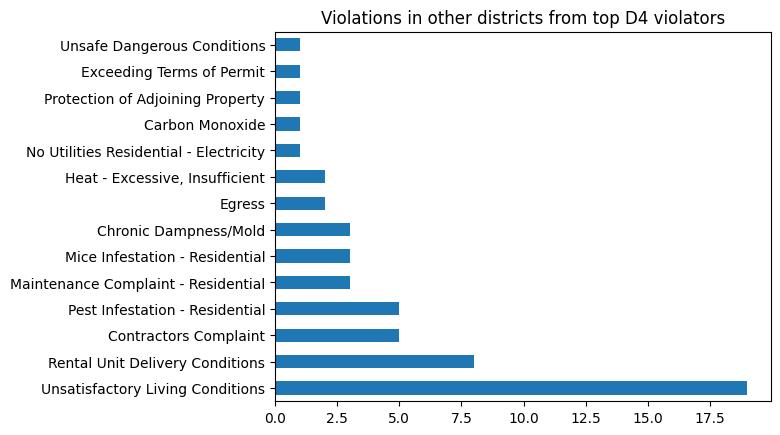

In [ ]:
violation_excluding_d4.plot(kind='barh', title = 'Violations in other districts from top D4 violators')

C:\Users\SUEDA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<AxesSubplot: title={'center': 'Violations in other Districts from top District 4 violators '}>

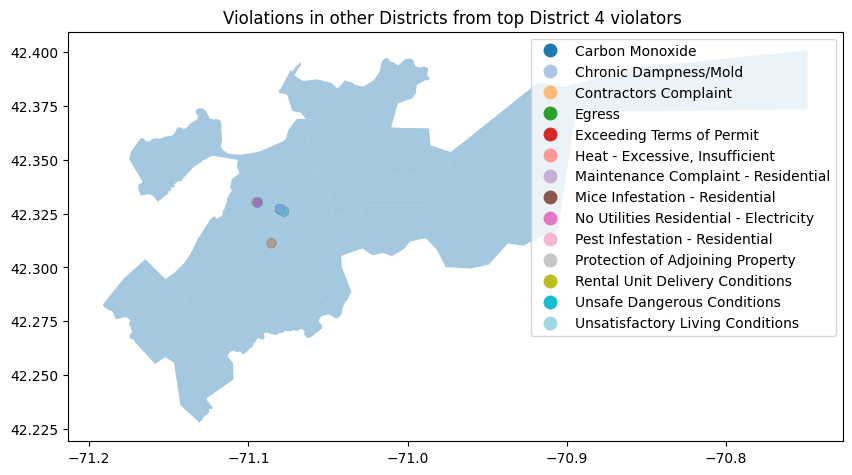

In [ ]:
#Plotting top 10 violation types 
geometry = [Point(xy) for xy in zip(geo_except_district_4_owners['longitude'], geo_except_district_4_owners['latitude'])]

crs = {'init': 'epsg:4326'}

geo_district_except_4 = gpd.GeoDataFrame(geo_except_district_4_owners, crs= crs, geometry = geometry)

fig,ax = plt.subplots(figsize = (10,10))

ax.set_title('Violations in other Districts from top District 4 violators ')

geo_district_except_4.plot(ax = ax,column = 'description' , legend=True, cmap ='tab20' )

shap.plot(ax = ax,  alpha = 0.4)

# District 5

### violation descriptions

In [ ]:
top_10_type_violation_d5 = geo_district_5_filtered['description'].value_counts().nlargest(10)
top_10_type_violation_d5

Unsatisfactory Living Conditions    1107
Work w/out Permit                    597
Pest Infestation - Residential       409
Heat - Excessive, Insufficient       406
Building Inspection Request          378
Contractors Complaint                319
Unsafe Dangerous Conditions          301
Electrical                           234
Protection of Adjoining Property     226
Mice Infestation - Residential       191
Name: description, dtype: int64

In [ ]:
#removing other descriptions
geo_district_5_filtered_violation = geo_district_5_filtered[geo_district_5_filtered['description'].isin([
    'Unsatisfactory Living Conditions', 'Work w/out Permit',
    'Pest Infestation - Residential', 'Heat - Excessive, Insufficient',
    'Building Inspection Request', 'Contractors Complaint', 
    'Unsafe Dangerous Conditions', 'Electrical', 
    'Protection of Adjoining Property', 'Mice Infestation - Residential'])]


<AxesSubplot: title={'center': 'Top 10 violation descriptions in District 5'}>

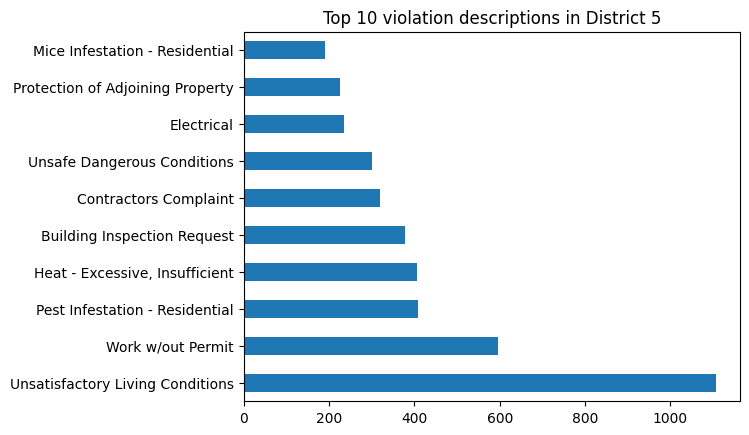

In [ ]:
top_10_type_violation_d5.plot(kind='barh', title = 'Top 10 violation descriptions in District 5')

C:\Users\SUEDA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<AxesSubplot: title={'center': 'Top 10 violation descriptions in District 5'}>

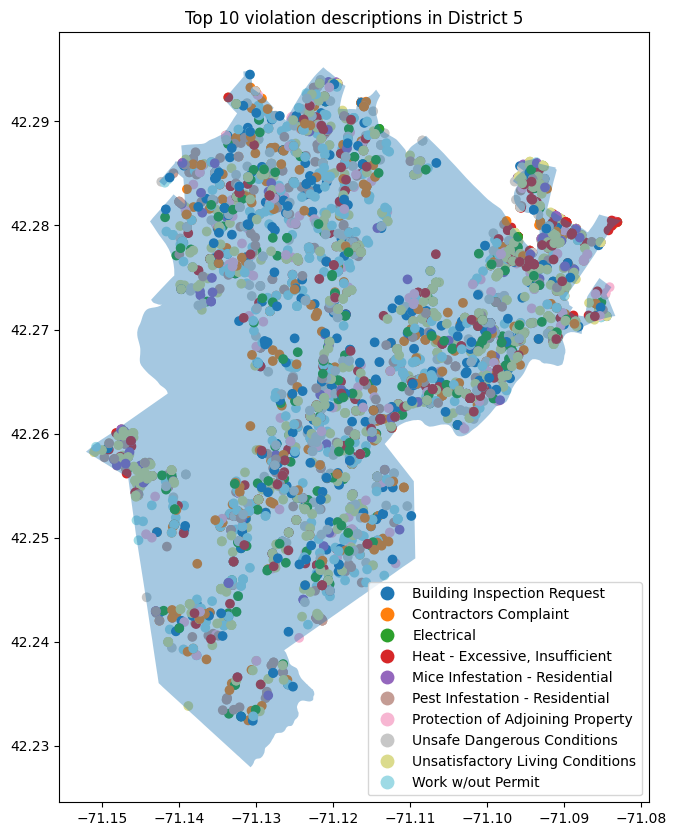

In [ ]:
geometry = [Point(xy) for xy in zip(geo_district_5_filtered_violation['longitude'], geo_district_5_filtered_violation['latitude'])]

crs = {'init': 'epsg:4326'}

geo_district_5 = gpd.GeoDataFrame(geo_district_5_filtered_violation, crs= crs, geometry = geometry)

fig,ax = plt.subplots(figsize = (10,10))

ax.set_title('Top 10 violation descriptions in District 5')

geo_district_5.plot(ax = ax ,column = 'description' , legend=True, cmap ='tab20')

shape_5.plot(ax = ax, alpha = 0.4)

### owner analysis

In [ ]:
top_10_type_owners_d5 = geo_district_5_filtered['owner'].value_counts().nlargest(10)
top_10_type_owners_d5 

GBM PORTFOLIO OWNER LLC               326
GEORGETOWNE HOMES ONE LLC MASS LLC    102
BISMARCK STREET OWNER LLC              80
CESCO LLC MASS LLC                     49
FERREIRA JOSE                          48
GEORGETOWNE HOMES TWO LLC MASS LLC     47
HIGH POINT VILLAGE CO MASS LPS         44
NIU JIANGHE                            41
WILMINGTON TRUST NATIONAL              38
HELGE CUMMINS LLC                      33
Name: owner, dtype: int64

In [ ]:
#removing other owners
geo_district_5_filtered_owners = geo_district_5_filtered[geo_district_5_filtered['owner'].isin([
    'GBM PORTFOLIO OWNER LLC', 'GEORGETOWNE HOMES ONE LLC MASS LLC', 
    'BISMARCK STREET OWNER LLC', 'CESCO LLC MASS LLC', 
    'FERREIRA JOSE', 'GEORGETOWNE HOMES TWO LLC MASS LLC', 
    'HIGH POINT VILLAGE CO MASS LPS', 'NIU JIANGHE', 
    'WILMINGTON TRUST NATIONAL', 'HELGE CUMMINS LLC'])]

<AxesSubplot: title={'center': 'Top 10 violators in District 5'}>

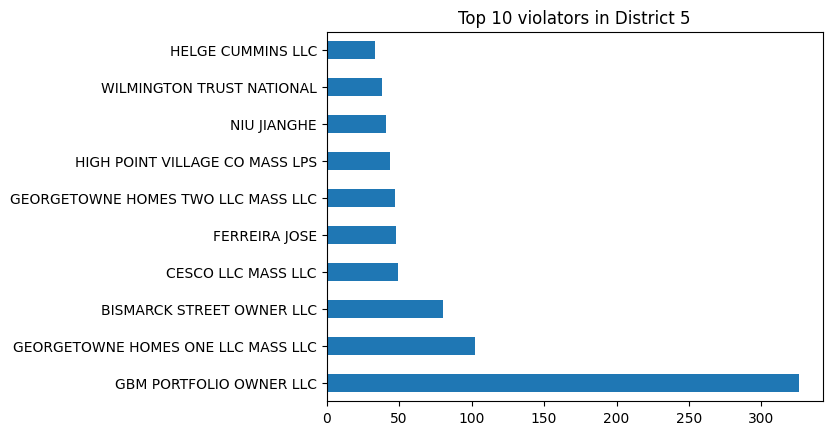

In [ ]:
top_10_type_owners_d5.plot(kind='barh', title = 'Top 10 violators in District 5')

C:\Users\SUEDA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<AxesSubplot: title={'center': 'Top 10 violators in District 5'}>

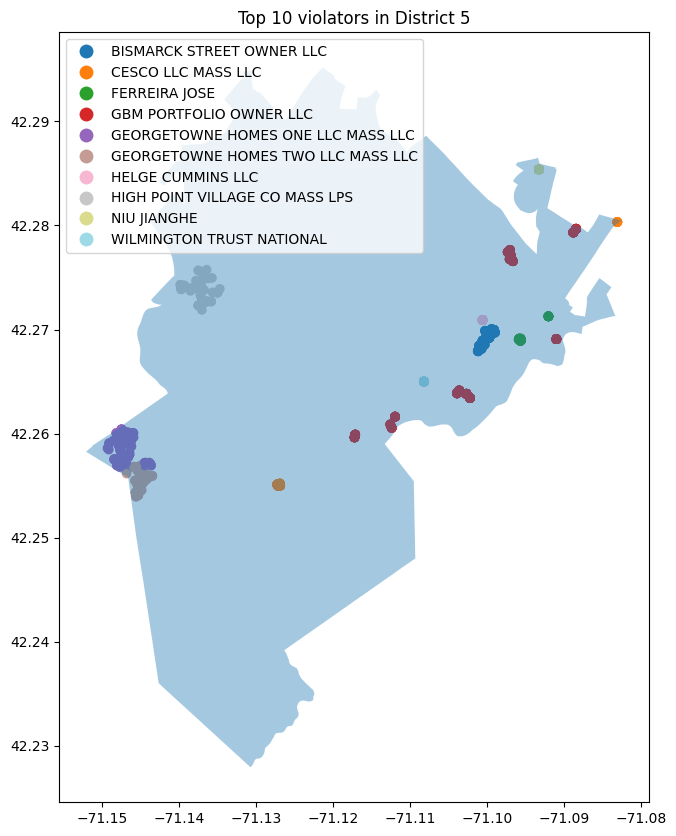

In [ ]:
#Plotting top 10 violators  
geometry = [Point(xy) for xy in zip(geo_district_5_filtered_owners['longitude'], geo_district_5_filtered_owners['latitude'])]

crs = {'init': 'epsg:4326'}

geo_district_5_own = gpd.GeoDataFrame(geo_district_5_filtered_owners, crs= crs, geometry = geometry)

fig,ax = plt.subplots(figsize = (10,10))

ax.set_title('Top 10 violators in District 5')

geo_district_5_own.plot(ax = ax,column = 'owner' , legend=True, cmap ='tab20' )

shape_5.plot(ax = ax,  alpha = 0.4)

### analysis of violations in other districts by the top 5 violators from district 5

In [ ]:
geo_except_district_5_owners = geo_exclude_district_5[geo_exclude_district_5['owner'].isin(['GBM PORTFOLIO OWNER LLC', 'GEORGETOWNE HOMES ONE LLC MASS LLC', 
                                                                                            'BISMARCK STREET OWNER LLC', 'CESCO LLC MASS LLC', 
                                                                                            'FERREIRA JOSE'])]


#geo_except_district_2_violations = geo_exclude_district_2[geo_exclude_district_2['description'].isin(['Contractors Complaint', 'Work w/out Permit', 
                                                                                                 #'Unsatisfactory Living Conditions', 'Unsafe Dangerous Conditions', 
                                                                                                 #'Building Inspection Request'])]
                                                          

geo_except_district_5_owners

date      violation_type  \
388     2022-10-25T08:50:00  Housing Complaints   
28861   2022-06-08T15:24:00  Housing Complaints   
29452   2022-06-05T13:09:00  Housing Complaints   
29453   2022-06-05T13:08:54  Housing Complaints   
29461   2022-06-05T01:28:01  Housing Complaints   
...                     ...                 ...   
297503  2018-02-06T19:21:00  Housing Complaints   
297699  2018-02-05T14:12:00  Housing Complaints   
298848  2018-01-26T10:37:00  Housing Complaints   
302907  2018-01-02T09:16:00  Housing Complaints   
306505  2017-12-08T10:28:00  Housing Complaints   

                                            description  \
388     Unsatisfactory Utilities - Electrical, Plumbing   
28861                  Unsatisfactory Living Conditions   
29452   Unsatisfactory Utilities - Electrical, Plumbing   
29453   Unsatisfactory Utilities - Electrical, Plumbing   
29461                                        Electrical   
...                                                 ...   
297503                   Heat - Excessive, Insufficient   
297699                 Unsatisfactory Living Conditions   
298848                                         Plumbing   
302907                   Heat - Excessive, Insufficient   
306505                 Unsatisfactory Living Conditions   

                          address neighborhood  zip_code      parcel  \
388      247 Walnut Ave #6, 02119      Roxbury      2119  1101781000   
28861     40 Willis St #21, 02125   Dorchester      2125  1301796000   
29452     40 Willis St #21, 02125   Dorchester      2125  1301796000   
29453         40 Willis St, 02125   Dorchester      2125  1301796000   
29461     40 Willis St #21, 02125   Dorchester      2125  1301796000   
...                           ...          ...       ...         ...   
297503  247 Walnut Ave #10, 02119      Roxbury      2119  1101781000   
297699  6 Rosedale St # 2A, 02124   Dorchester      2124  1700627000   
298848   15 Ruggles St # 1, 02119      Roxbury      2119   902452000   
302907    750 Morton St #1, 02124   Dorchester      2124  1403417000   
306505       6 Rosedale St, 02124   Dorchester      2124  1700627000   

                          owner  year built  year remodeled  ...  \
388     GBM PORTFOLIO OWNER LLC      1920.0             NaN  ...   
28861        CESCO LLC MASS LLC      1936.0          1981.0  ...   
29452        CESCO LLC MASS LLC      1936.0          1981.0  ...   
29453        CESCO LLC MASS LLC      1936.0          1981.0  ...   
29461        CESCO LLC MASS LLC      1936.0          1981.0  ...   
...                         ...         ...             ...  ...   
297503  GBM PORTFOLIO OWNER LLC      1920.0             NaN  ...   
297699       CESCO LLC MASS LLC      1925.0          1994.0  ...   
298848  GBM PORTFOLIO OWNER LLC      1899.0          2015.0  ...   
302907       CESCO LLC MASS LLC      1910.0          1978.0  ...   
306505       CESCO LLC MASS LLC      1925.0          1994.0  ...   

                          geometry  intersect district 1  \
388     POINT (-71.09128 42.31813)                 False   
28861   POINT (-71.06107 42.31808)                 False   
29452   POINT (-71.06107 42.31808)                 False   
29453   POINT (-71.06108 42.31809)                 False   
29461   POINT (-71.06107 42.31808)                 False   
...                            ...                   ...   
297503  POINT (-71.09128 42.31813)                 False   
297699  POINT (-71.07216 42.29264)                 False   
298848  POINT (-71.08321 42.33162)                 False   
302907  POINT (-71.08929 42.28398)                 False   
306505  POINT (-71.07223 42.29264)                 False   

        intersect district 2 intersect district 3  intersect district 4  \
388                    False                False                 False   
28861                  False                 True                 False   
29452                  False                 True                 False  

In [ ]:
violation_excluding_d5 = geo_except_district_5_owners['description'].value_counts()
violation_excluding_d5

Unsatisfactory Living Conditions                   39
Heat - Excessive, Insufficient                     32
Maintenance Complaint - Residential                 8
Unsafe Dangerous Conditions                         6
Mice Infestation - Residential                      5
Unsatisfactory Utilities - Electrical, Plumbing     5
Bed Bugs                                            3
Building Inspection Request                         3
Pest Infestation - Residential                      2
Illegal Occupancy                                   2
Electrical                                          2
Carbon Monoxide                                     1
Contractors Complaint                               1
Chronic Dampness/Mold                               1
Plumbing                                            1
Name: description, dtype: int64

<AxesSubplot: title={'center': 'Violations in other districts from top D5 violators'}>

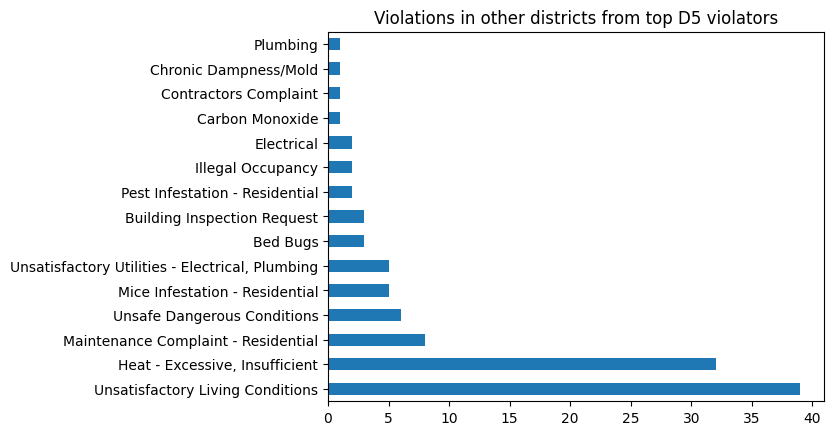

In [ ]:
violation_excluding_d5.plot(kind='barh', title = 'Violations in other districts from top D5 violators')

In [ ]:
violators_excluding_d5 = geo_except_district_5_owners['owner'].value_counts()
violators_excluding_d5

CESCO LLC MASS LLC         56
GBM PORTFOLIO OWNER LLC    45
FERREIRA JOSE              10
Name: owner, dtype: int64

<AxesSubplot: title={'center': 'Violations in other districts from top D5 violators'}>

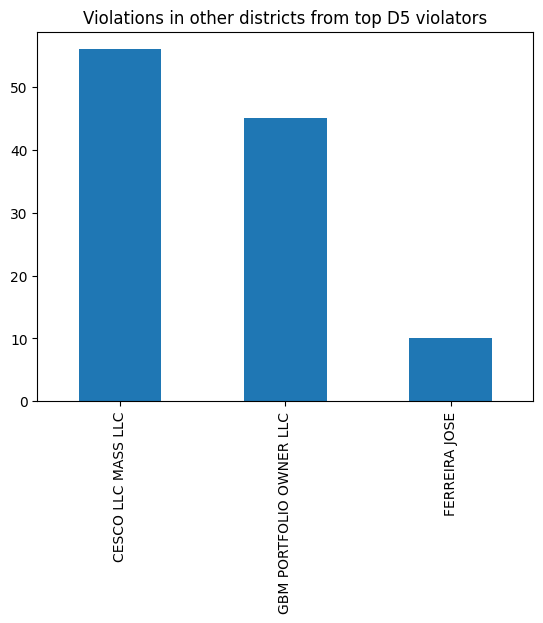

In [ ]:
violators_excluding_d5.plot(kind='bar', title = 'Violations in other districts from top D5 violators')

C:\Users\SUEDA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<AxesSubplot: title={'center': 'Violations in other Districts from top District 5 violators '}>

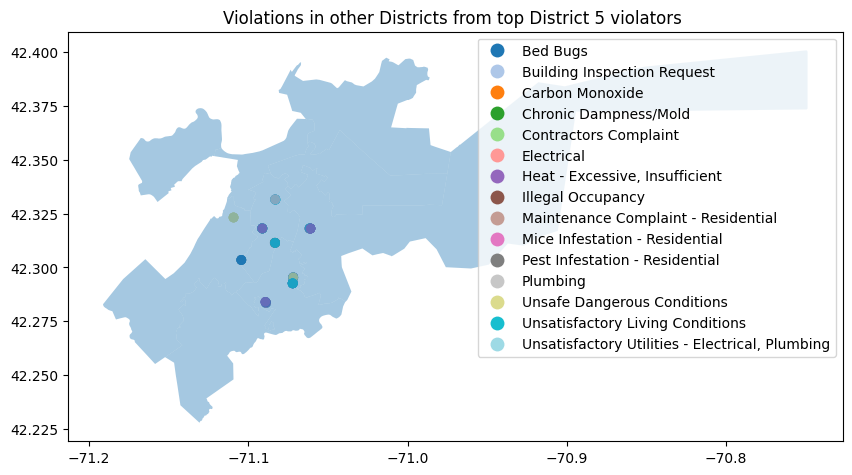

In [ ]:
#Plotting top 10 violation types 
geometry = [Point(xy) for xy in zip(geo_except_district_5_owners['longitude'], geo_except_district_5_owners['latitude'])]

crs = {'init': 'epsg:4326'}

geo_district_except_5 = gpd.GeoDataFrame(geo_except_district_5_owners, crs= crs, geometry = geometry)

fig,ax = plt.subplots(figsize = (10,10))

ax.set_title('Violations in other Districts from top District 5 violators ')

geo_district_except_5.plot(ax = ax,column = 'description' , legend=True, cmap ='tab20' )

shap.plot(ax = ax,  alpha = 0.4)

C:\Users\SUEDA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<AxesSubplot: title={'center': 'Violations in other Districts from top District 5 violators '}>

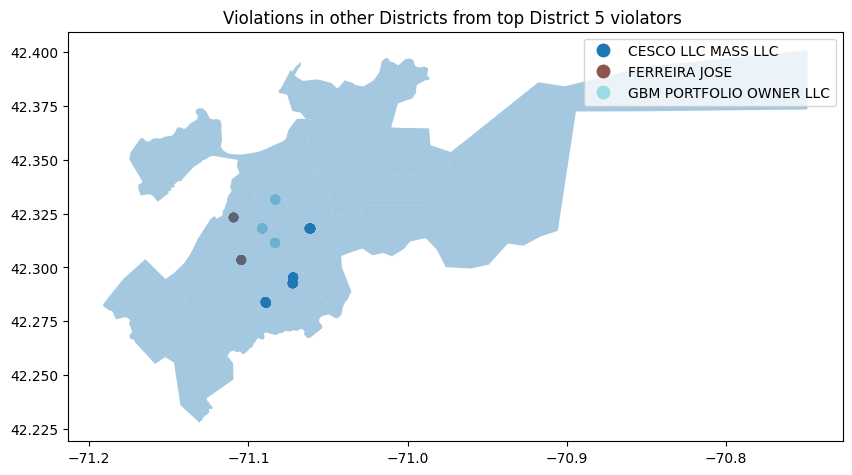

In [ ]:
#Plotting top 10 violation types 
geometry = [Point(xy) for xy in zip(geo_except_district_5_owners['longitude'], geo_except_district_5_owners['latitude'])]

crs = {'init': 'epsg:4326'}

geo_district_except_5_owner = gpd.GeoDataFrame(geo_except_district_5_owners, crs= crs, geometry = geometry)

fig,ax = plt.subplots(figsize = (10,10))

ax.set_title('Violations in other Districts from top District 5 violators ')

geo_district_except_5_owner.plot(ax = ax,column = 'owner' , legend=True, cmap ='tab20' )

shap.plot(ax = ax,  alpha = 0.4)

# District 6

### violation descriptions 

In [ ]:
top_10_type_violation_d6 = geo_district_6_filtered['description'].value_counts().nlargest(10)
top_10_type_violation_d6

Unsatisfactory Living Conditions    679
Work w/out Permit                   517
Contractors Complaint               516
Building Inspection Request         401
Unsafe Dangerous Conditions         328
Pest Infestation - Residential      302
Heat - Excessive, Insufficient      271
Working Beyond Hours                270
Protection of Adjoining Property    208
Electrical                          186
Name: description, dtype: int64

In [ ]:
#removing other descriptions
geo_district_6_filtered_violation = geo_district_6_filtered[geo_district_6_filtered['description'].isin([
    'Unsatisfactory Living Conditions', 'Contractors Complaint', 
    'Work w/out Permit', 'Building Inspection Request',
    'Unsafe Dangerous Conditions', 'Pest Infestation - Residential',
    'Heat - Excessive, Insufficient', 'Working Beyond Hours',
     'Protection of Adjoining Property', 'Electrical'])]

<AxesSubplot: title={'center': 'Top 10 violation descriptions in District 6'}>

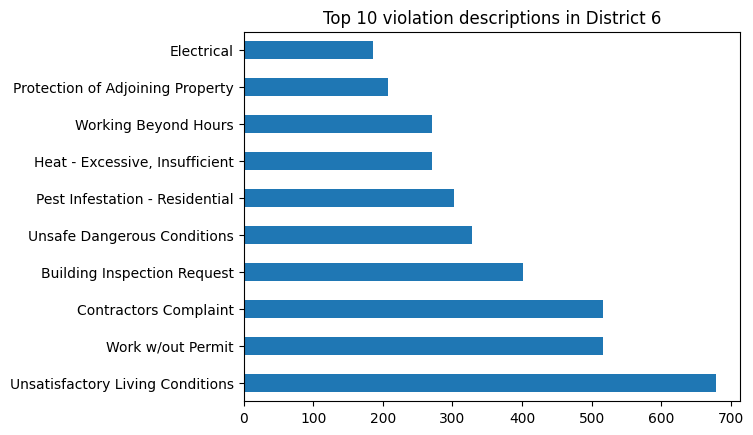

In [ ]:
top_10_type_violation_d6.plot(kind='barh', title = 'Top 10 violation descriptions in District 6')

C:\Users\SUEDA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<AxesSubplot: title={'center': 'Top 10 violation descriptions in District 6'}>

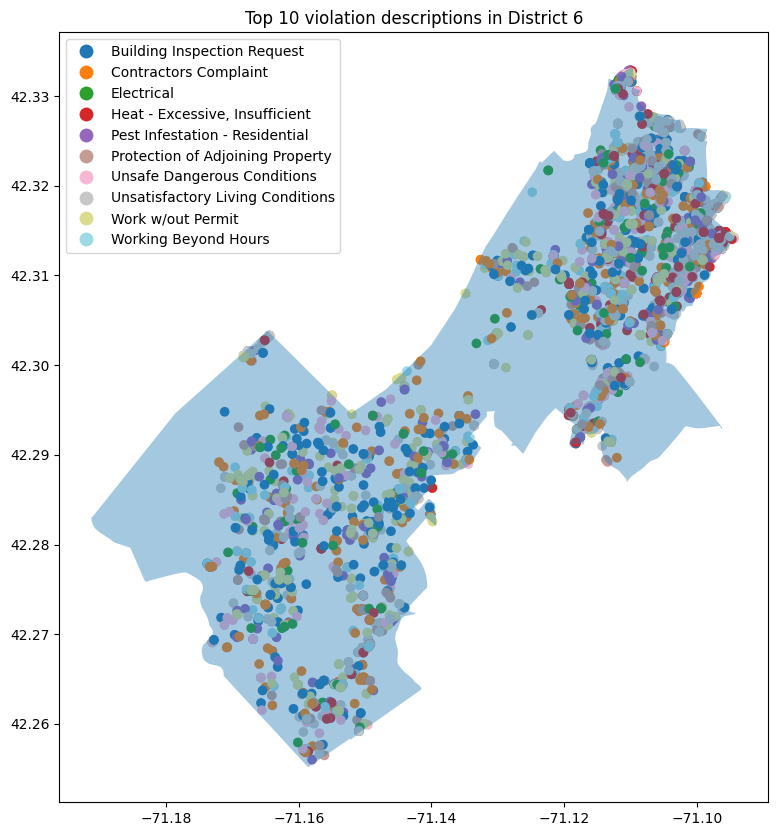

In [ ]:
geometry = [Point(xy) for xy in zip(geo_district_6_filtered_violation['longitude'], geo_district_6_filtered_violation['latitude'])]

crs = {'init': 'epsg:4326'}

geo_district_6 = gpd.GeoDataFrame(geo_district_6_filtered_violation, crs= crs, geometry = geometry)

fig,ax = plt.subplots(figsize = (10,10))

ax.set_title('Top 10 violation descriptions in District 6')

geo_district_6.plot(ax = ax ,column = 'description' , legend=True, cmap ='tab20')

shape_6.plot(ax = ax, alpha = 0.4)

### owner analysis

In [ ]:
top_10_type_owners_d6 = geo_district_6_filtered['owner'].value_counts().nlargest(10)
top_10_type_owners_d6 

FORESTVALE APARTMENTS LP MASS LP    60
UNION-GREEN REALTY LLC MASS LLC     57
STONY BROOK CONDOMINIUM TR          56
UE APARTMENTS LLC                   34
BC ROCKINGHAM GLEN LLC              29
BROADLAWN PK CONDOMINIUM TR         28
SOUTH STREET LJS LLC MASS LLC       26
J P HOUSING LP                      26
HORIZON DEVELOPMENT LLC             26
BRACKETT KRISTINE TS                25
Name: owner, dtype: int64

In [ ]:
#removing other owners
geo_district_6_filtered_owners = geo_district_6_filtered[geo_district_6_filtered['owner'].isin([
    'FORESTVALE APARTMENTS LP MASS LP', 'UNION-GREEN REALTY LLC MASS LLC', 
    'STONY BROOK CONDOMINIUM TR', 'UE APARTMENTS LLC', 
    'BC ROCKINGHAM GLEN LLC', 'BROADLAWN PK CONDOMINIUM TR', 
    'SOUTH STREET LJS LLC MASS LLC', 'J P HOUSING LP', 
    'HORIZON DEVELOPMENT LLC', 'BRACKETT KRISTINE TS'])]

<AxesSubplot: title={'center': 'Top 10 violators in District 6'}>

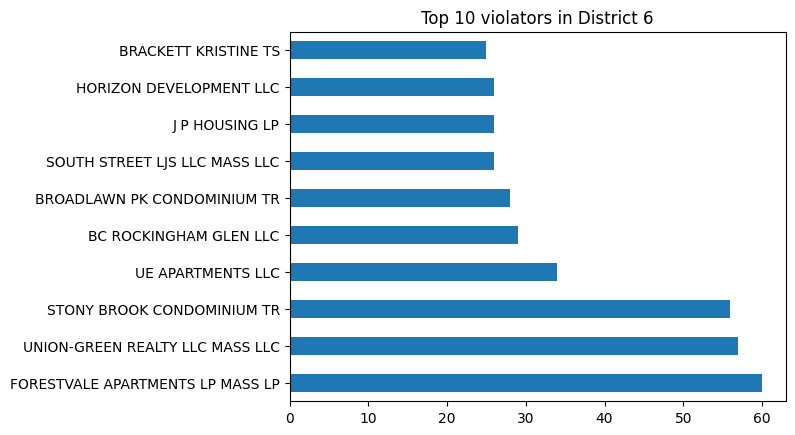

In [ ]:
top_10_type_owners_d6.plot(kind='barh', title = 'Top 10 violators in District 6')

C:\Users\SUEDA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<AxesSubplot: title={'center': 'Top 10 violators in District 6'}>

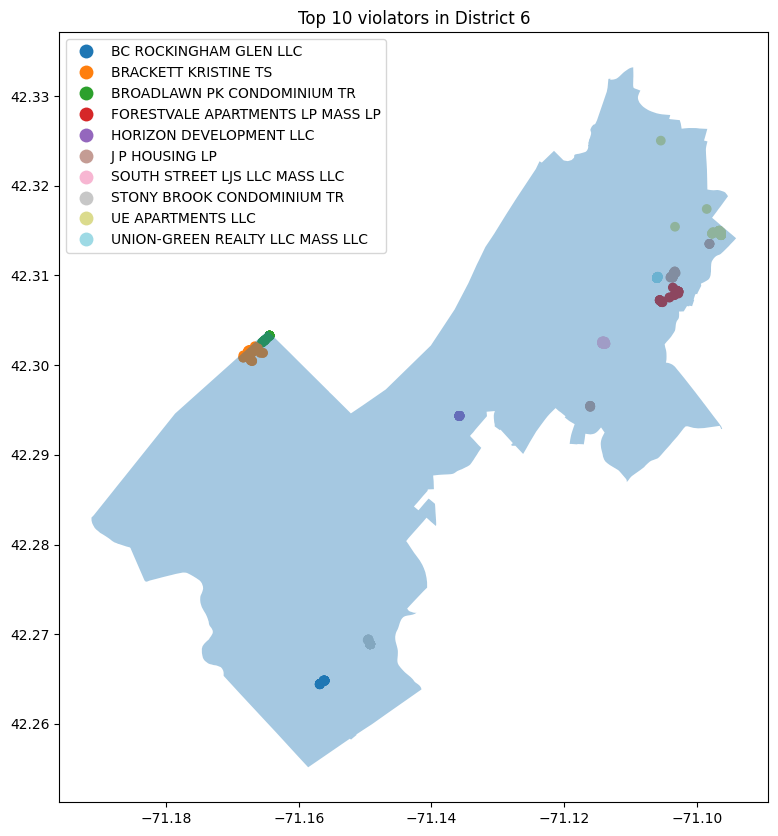

In [ ]:
#Plotting top 10 violators  
geometry = [Point(xy) for xy in zip(geo_district_6_filtered_owners['longitude'], geo_district_6_filtered_owners['latitude'])]

crs = {'init': 'epsg:4326'}

geo_district_6_own = gpd.GeoDataFrame(geo_district_6_filtered_owners, crs= crs, geometry = geometry)

fig,ax = plt.subplots(figsize = (10,10))

ax.set_title('Top 10 violators in District 6')

geo_district_6_own.plot(ax = ax,column = 'owner' , legend=True, cmap ='tab20' )

shape_6.plot(ax = ax,  alpha = 0.4)

### analysis of violations in other districts by the top 5 violators from district 6

In [ ]:
geo_except_district_6_owners = geo_exclude_district_6[geo_exclude_district_6['owner'].isin(['FORESTVALE APARTMENTS LP MASS LP', 'UNION-GREEN REALTY LLC MASS LLC', 
                                                                                            'STONY BROOK CONDOMINIUM TR', 'UE APARTMENTS LLC', 
                                                                                            'BC ROCKINGHAM GLEN LLC'])]


#geo_except_district_2_violations = geo_exclude_district_2[geo_exclude_district_2['description'].isin(['Contractors Complaint', 'Work w/out Permit', 
                                                                                                 #'Unsatisfactory Living Conditions', 'Unsafe Dangerous Conditions', 
                                                                                                 #'Building Inspection Request'])]
                                                          

geo_except_district_6_owners

date      violation_type  \
109523  2021-02-24T10:41:00  Housing Complaints   
115616  2021-01-15T12:40:00  Housing Complaints   
153509  2020-06-15T12:48:00  Housing Complaints   
178210  2019-12-13T15:20:00  Housing Complaints   
181662  2019-11-23T07:20:00  Housing Complaints   
184349  2019-11-06T10:29:00  Housing Complaints   
188032  2019-10-17T14:08:00  Housing Complaints   
200999  2019-08-22T11:24:00  Housing Complaints   
289798  2018-03-21T14:31:00  Housing Complaints   

                             description                  address  \
109523    Heat - Excessive, Insufficient  60 Seaver St # 4, 02121   
115616    Heat - Excessive, Insufficient  60 Seaver St # 4, 02121   
153509             Chronic Dampness/Mold      60 Seaver St, 02121   
178210    Heat - Excessive, Insufficient  60 Seaver St # 4, 02121   
181662       Building Inspection Request  60 Seaver St # 6, 02121   
184349    Heat - Excessive, Insufficient  60 Seaver St # 4, 02121   
188032  Unsatisfactory Living Conditions  60 Seaver St # 2, 02121   
200999  Unsatisfactory Living Conditions      60 Seaver St, 02121   
289798  Unsatisfactory Living Conditions  60 Seaver St # 2, 02121   

       neighborhood  zip_code      parcel              owner  year built  \
109523   Dorchester      2121  1203077000  UE APARTMENTS LLC      1900.0   
115616   Dorchester      2121  1203077000  UE APARTMENTS LLC      1900.0   
153509   Dorchester      2121  1203077000  UE APARTMENTS LLC      1900.0   
178210   Dorchester      2121  1203077000  UE APARTMENTS LLC      1900.0   
181662   Dorchester      2121  1203077000  UE APARTMENTS LLC      1900.0   
184349   Dorchester      2121  1203077000  UE APARTMENTS LLC      1900.0   
188032   Dorchester      2121  1203077000  UE APARTMENTS LLC      1900.0   
200999   Dorchester      2121  1203077000  UE APARTMENTS LLC      1900.0   
289798   Dorchester      2121  1203077000  UE APARTMENTS LLC      1900.0   

        year remodeled  ...                    geometry  intersect district 1  \
109523          2011.0  ...  POINT (-71.09312 42.31167)                 False   
115616          2011.0  ...  POINT (-71.09312 42.31167)                 False   
153509          2011.0  ...  POINT (-71.09312 42.31167)                 False   
178210          2011.0  ...  POINT (-71.09312 42.31167)                 False   
181662          2011.0  ...  POINT (-71.09312 42.31167)                 False   
184349          2011.0  ...  POINT (-71.09312 42.31167)                 False   
188032          2011.0  ...  POINT (-71.09312 42.31167)                 False   
200999          2011.0  ...  POINT (-71.09312 42.31167)                 False   
289798          2011.0  ...  POINT (-71.09312 42.31167)                 False   

        intersect district 2 intersect district 3  intersect district 4  \
109523                 False                False                 False   
115616                 False                False                 False   
153509                 False                False                 False   
178210                 False                False                 False   
181662                 False                False                 False   
184349                 False                False                 False   
188032                 False                False                 False   
200999                 False                False                 False   
289798                 False                False                 False   

        intersect district 5  intersect district 6  intersect district 7  \
109523                 False                 False                  True   
115616                 False                 False                  True   
153509                 False                 False                  True   
178210                 False                 False                  True   
181662                 False                 False                  True   
184349                 False              

In [ ]:
#violations of the top 5 owners from d1 in other districts
violation_excluding_d6 = geo_except_district_6_owners['description'].value_counts()
violation_excluding_d6


Heat - Excessive, Insufficient      4
Unsatisfactory Living Conditions    3
Chronic Dampness/Mold               1
Building Inspection Request         1
Name: description, dtype: int64

<AxesSubplot: title={'center': 'Violations in other districts from top 6 violators'}>

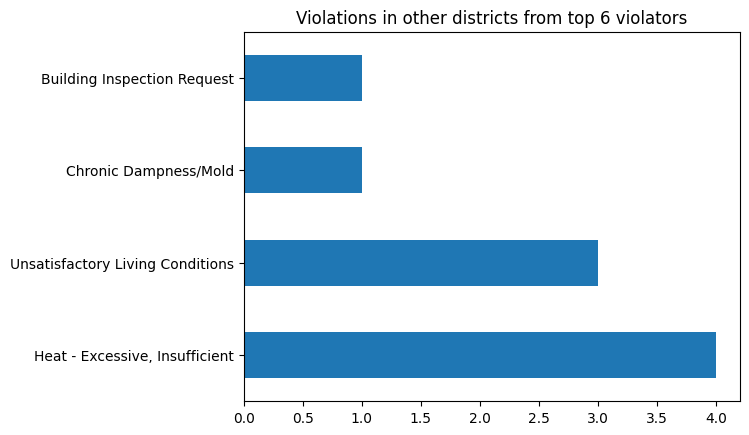

In [ ]:
violation_excluding_d6.plot(kind='barh', title = 'Violations in other districts from top 6 violators')

C:\Users\SUEDA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<AxesSubplot: title={'center': 'Violations in other Districts from top District 6 violators '}>

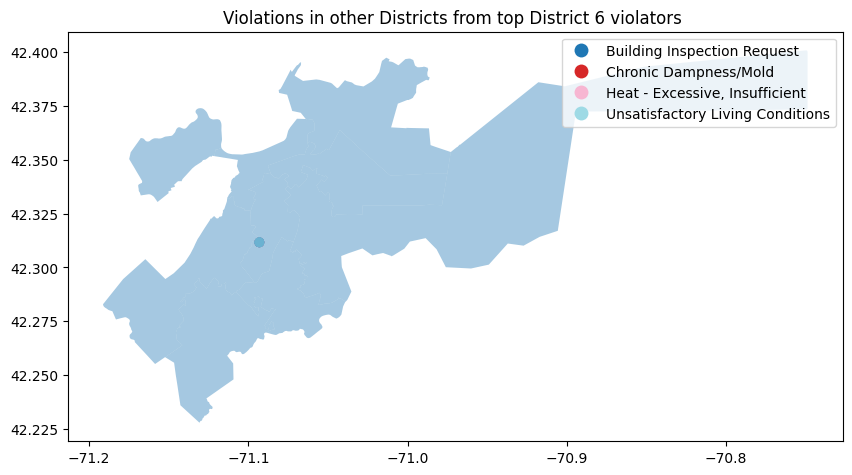

In [ ]:
#Plotting top 10 violation types 
geometry = [Point(xy) for xy in zip(geo_except_district_6_owners['longitude'], geo_except_district_6_owners['latitude'])]

crs = {'init': 'epsg:4326'}

geo_district_except_6 = gpd.GeoDataFrame(geo_except_district_6_owners, crs= crs, geometry = geometry)

fig,ax = plt.subplots(figsize = (10,10))

ax.set_title('Violations in other Districts from top District 6 violators ')

geo_district_except_6.plot(ax = ax,column = 'description' , legend=True, cmap ='tab20' )

shap.plot(ax = ax,  alpha = 0.4)

# District 7
### violation descriptions

In [ ]:
top_10_type_violation_d7 = geo_district_7_filtered['description'].value_counts().nlargest(10)
top_10_type_violation_d7

Unsatisfactory Living Conditions       1664
Heat - Excessive, Insufficient          607
Pest Infestation - Residential          543
Work w/out Permit                       446
Contractors Complaint                   442
Building Inspection Request             320
Unsafe Dangerous Conditions             311
Mice Infestation - Residential          308
Maintenance Complaint - Residential     224
Working Beyond Hours                    207
Name: description, dtype: int64

In [ ]:
#removing other descriptions
geo_district_7_filtered_violation = geo_district_7_filtered[geo_district_7_filtered['description'].isin([
    'Unsatisfactory Living Conditions', 'Heat - Excessive, Insufficient',
    'Pest Infestation - Residential', 'Work w/out Permit',
    'Contractors Complaint', 'Building Inspection Request',
    'Unsafe Dangerous Conditions', 'Mice Infestation - Residential', 
    'Maintenance Complaint - Residential', 'Working Beyond Hours'])]


<AxesSubplot: title={'center': 'Top 10 violation descriptions in District 7'}>

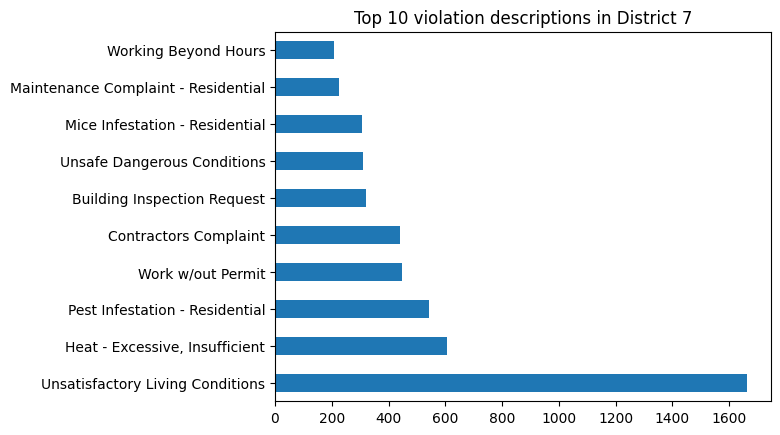

In [ ]:
top_10_type_violation_d7.plot(kind='barh', title = 'Top 10 violation descriptions in District 7')

C:\Users\SUEDA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<AxesSubplot: title={'center': 'Top 10 violation descriptions in District 7'}>

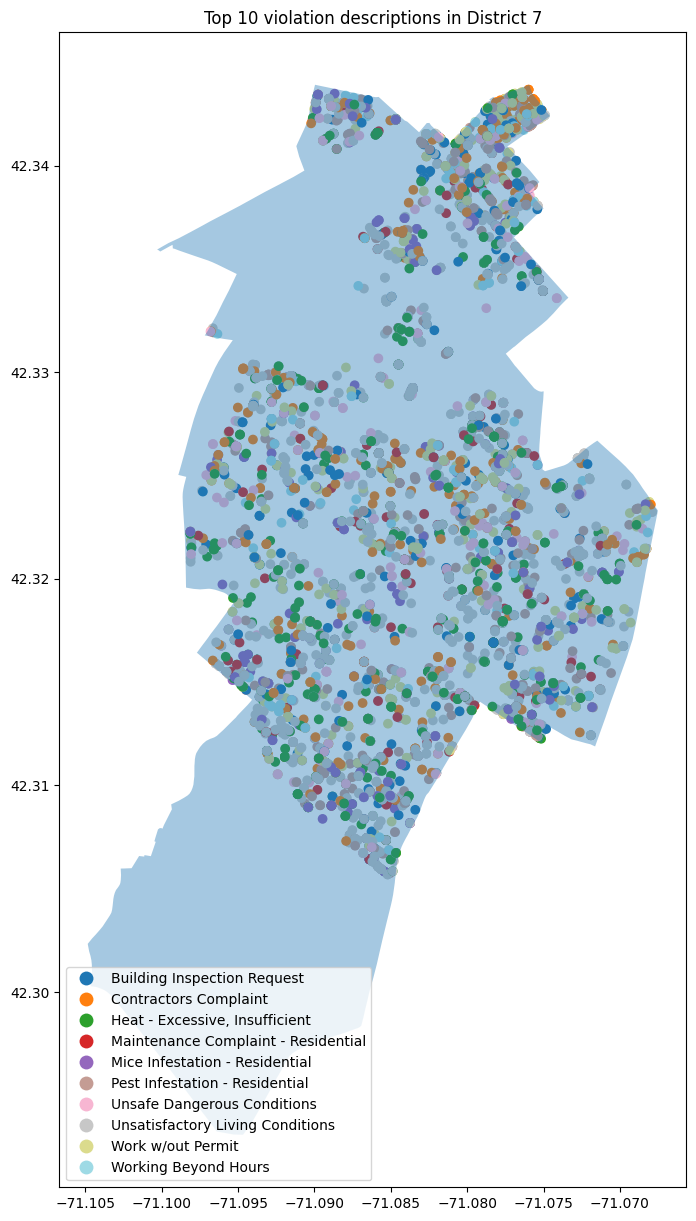

In [ ]:
geometry = [Point(xy) for xy in zip(geo_district_7_filtered_violation['longitude'], geo_district_7_filtered_violation['latitude'])]

crs = {'init': 'epsg:4326'}

geo_district_7 = gpd.GeoDataFrame(geo_district_7_filtered_violation, crs= crs, geometry = geometry)

fig,ax = plt.subplots(figsize = (15,15))

ax.set_title('Top 10 violation descriptions in District 7')

geo_district_7.plot(ax = ax ,column = 'description' , legend=True, cmap ='tab20')

shape_7.plot(ax = ax, alpha = 0.4)

### owner analysis

In [ ]:
top_10_type_owners_d7 = geo_district_7_filtered['owner'].value_counts().nlargest(10)
top_10_type_owners_d7 

NORTHAMPTON SQ CONDO ASSOC             167
KASANOF LAND LLC                       146
PNC ARHPF BLUE MOUNTAIN APTS LLC        73
LACONCHA LIMITED PARTNERSHIP            72
DARTMOUTH HOTEL LP                      65
MILLER DWIGHT                           62
RIVIERA CONDOMINIUM ASSN                62
PNC ARHPF NEW PORT ANTONIO APTS LLC     60
PHILLIPS BROOKS SCHOOL                  58
JPNDC  PITTS  LLC                       55
Name: owner, dtype: int64

In [ ]:
#removing other owners
geo_district_7_filtered_owners = geo_district_7_filtered[geo_district_7_filtered['owner'].isin([
    'NORTHAMPTON SQ CONDO ASSOC', 'KASANOF LAND LLC', 
    'PNC ARHPF BLUE MOUNTAIN APTS LLC', 'LACONCHA LIMITED PARTNERSHIP', 
    'DARTMOUTH HOTEL LP', 'RIVIERA CONDOMINIUM ASSN', 
    'MILLER DWIGHT', 'PNC ARHPF NEW PORT ANTONIO APTS LLC', 
    'PHILLIPS BROOKS SCHOOL', 'JPNDC  PITTS  LLC'])]

<AxesSubplot: title={'center': 'Top 10 violators in District 7'}>

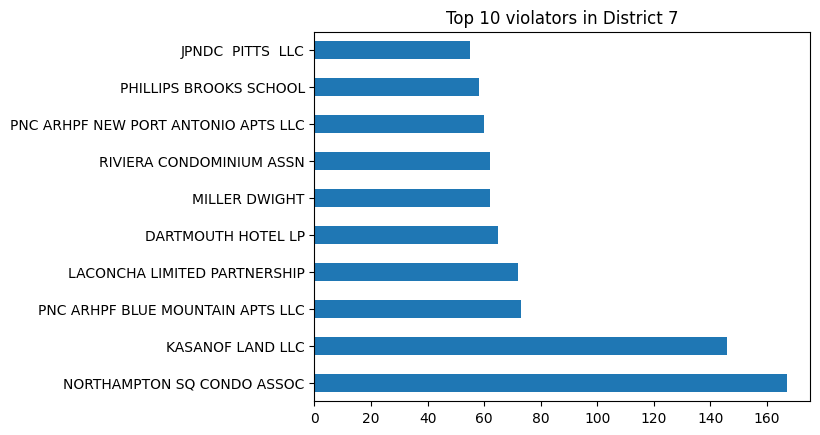

In [ ]:
top_10_type_owners_d7.plot(kind='barh', title = 'Top 10 violators in District 7')

C:\Users\SUEDA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<AxesSubplot: title={'center': 'Top 10 violators in District 7'}>

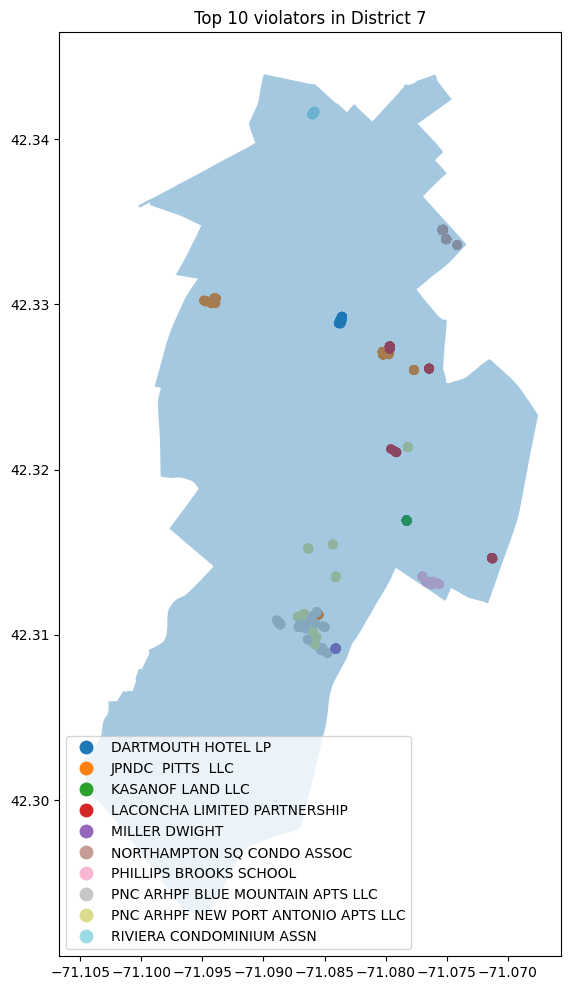

In [ ]:
#Plotting top 10 violators  
geometry = [Point(xy) for xy in zip(geo_district_7_filtered_owners['longitude'], geo_district_7_filtered_owners['latitude'])]

crs = {'init': 'epsg:4326'}

geo_district_7_own = gpd.GeoDataFrame(geo_district_7_filtered_owners, crs= crs, geometry = geometry)

fig,ax = plt.subplots(figsize = (12,12))

ax.set_title('Top 10 violators in District 7')

geo_district_7_own.plot(ax = ax, column = 'owner' , legend=True, cmap ='tab20' )

shape_7.plot(ax = ax,  alpha = 0.4)

### analysis of violations in other districts by the top 5 violators from district 7

In [ ]:
geo_except_district_7_owners = geo_exclude_district_7[geo_exclude_district_7['owner'].isin(['NORTHAMPTON SQ CONDO ASSOC', 'KASANOF LAND LLC', 
                                                                                            'PNC ARHPF BLUE MOUNTAIN APTS LLC', 'LACONCHA LIMITED PARTNERSHIP', 
                                                                                            'DARTMOUTH HOTEL LP'])]


#geo_except_district_2_violations = geo_exclude_district_2[geo_exclude_district_2['description'].isin(['Contractors Complaint', 'Work w/out Permit', 
                                                                                                 #'Unsatisfactory Living Conditions', 'Unsafe Dangerous Conditions', 
                                                                                                 #'Building Inspection Request'])]
                                                          

geo_except_district_7_owners

Empty GeoDataFrame
Columns: [date, violation_type, description, address, neighborhood, zip_code, parcel, owner, year built, year remodeled, property_type, latitude, longitude, geometry, intersect district 1, intersect district 2, intersect district 3, intersect district 4, intersect district 5, intersect district 6, intersect district 7, intersect district 8, intersect district 9]
Index: []

[0 rows x 23 columns]

the owners do not have properties in other districts

# District 8
### violation descriptions

In [ ]:
top_10_type_violation_d8 = geo_district_8_filtered['description'].value_counts().nlargest(10)
top_10_type_violation_d8

Unsatisfactory Living Conditions    645
Contractors Complaint               585
Work w/out Permit                   465
Building Inspection Request         353
Working Beyond Hours                342
Heat - Excessive, Insufficient      337
Pest Infestation - Residential      320
Unsafe Dangerous Conditions         317
Electrical                          214
Maintenance - Homeowner             140
Name: description, dtype: int64

In [ ]:
#removing other descriptions
geo_district_8_filtered_violation = geo_district_8_filtered[geo_district_8_filtered['description'].isin([
    'Unsatisfactory Living Conditions', 'Contractors Complaint',
    'Work w/out Permit', 'Building Inspection Request',
    'Working Beyond Hours', 'Heat - Excessive, Insufficient',
    'Unsafe Dangerous Conditions', 'Pest Infestation - Residential',
    'Electrical', 'Maintenance - Homeowner'])]


<AxesSubplot: title={'center': 'Top 10 violation descriptions in District 8'}>

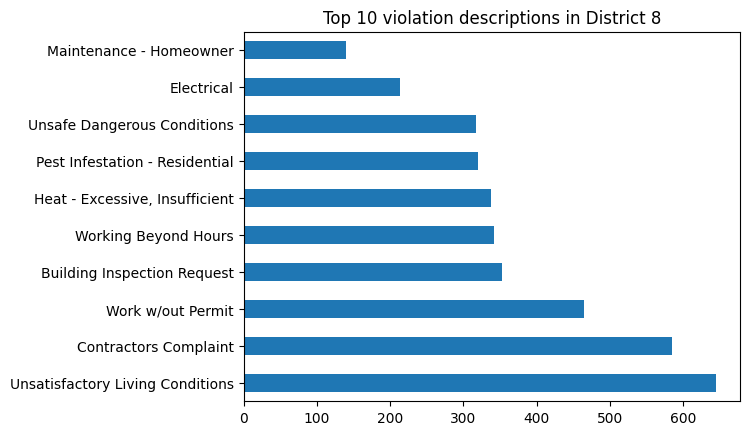

In [ ]:
top_10_type_violation_d8.plot(kind='barh', title = 'Top 10 violation descriptions in District 8')

C:\Users\SUEDA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<AxesSubplot: title={'center': 'Top 10 violation descriptions in District 8'}>

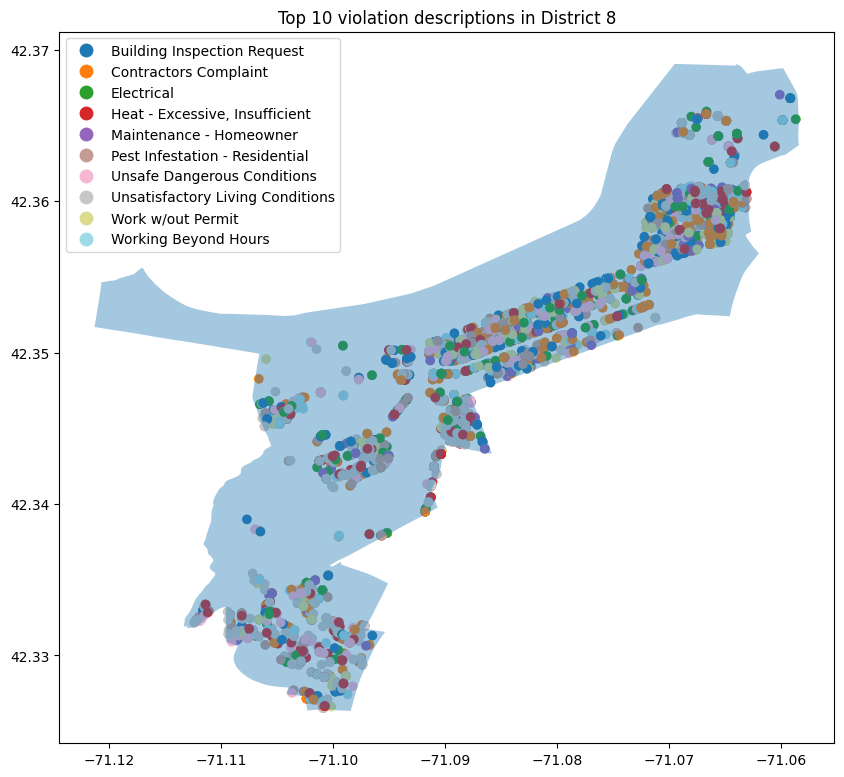

In [ ]:
geometry = [Point(xy) for xy in zip(geo_district_8_filtered_violation['longitude'], geo_district_8_filtered_violation['latitude'])]

crs = {'init': 'epsg:4326'}

geo_district_8 = gpd.GeoDataFrame(geo_district_8_filtered_violation, crs= crs, geometry = geometry)

fig,ax = plt.subplots(figsize = (10,10))

ax.set_title('Top 10 violation descriptions in District 8')

geo_district_8.plot(ax = ax ,column = 'description' , legend=True, cmap ='tab20')

shape_8.plot(ax = ax, alpha = 0.4)

### owner analysis

In [ ]:
top_10_type_owners_d8 = geo_district_8_filtered['owner'].value_counts().nlargest(10)
top_10_type_owners_d8 

CHARLES RIVER PARK D COMPANY           65
LDJ DEVELOPMENT LLC                    53
BURBANK GARDENS APARTMENTS   LLC       49
HEMENWAY CONDOMINIUM TR                47
ERP OPERATING LP                       44
JHB MASSACHUSETTS PROP LLC MASS LLC    41
PETERBOROUGH HOUSING                   36
HEMENWAY PARK DRIVE LLC DEL LLC        36
29 WEST CEDAR LLC                      34
HEMENWAY APARTMENTS COMPANY            34
Name: owner, dtype: int64

In [ ]:
#removing other owners
geo_district_8_filtered_owners = geo_district_8_filtered[geo_district_8_filtered['owner'].isin([
    'CHARLES RIVER PARK D COMPANY', 'LDJ DEVELOPMENT LLC', 
    'BURBANK GARDENS APARTMENTS   LLC', 'HEMENWAY CONDOMINIUM TR', 
    'ERP OPERATING LP', 'JHB MASSACHUSETTS PROP LLC MASS LLC', 
    'HEMENWAY PARK DRIVE LLC DEL LLC', 'PETERBOROUGH HOUSING', 
    '29 WEST CEDAR LLC', 'HEMENWAY APARTMENTS COMPANY'])]

<AxesSubplot: title={'center': 'Top 10 violators in District 8'}>

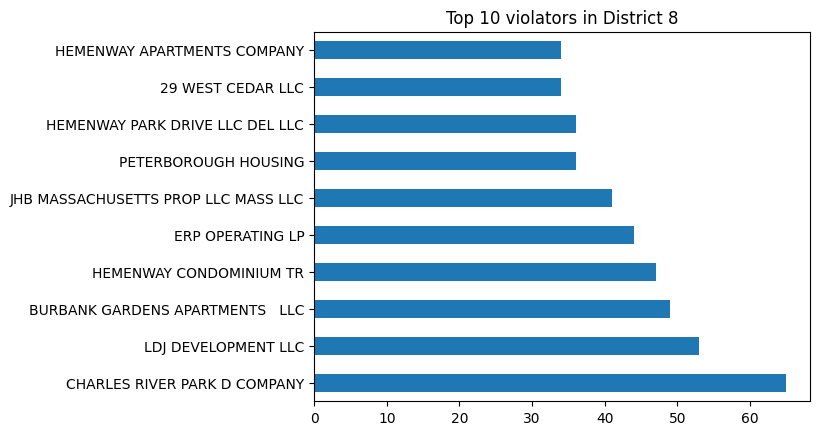

In [ ]:
top_10_type_owners_d8.plot(kind='barh', title = 'Top 10 violators in District 8')

C:\Users\SUEDA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<AxesSubplot: title={'center': 'Top 10 violators in District 8'}>

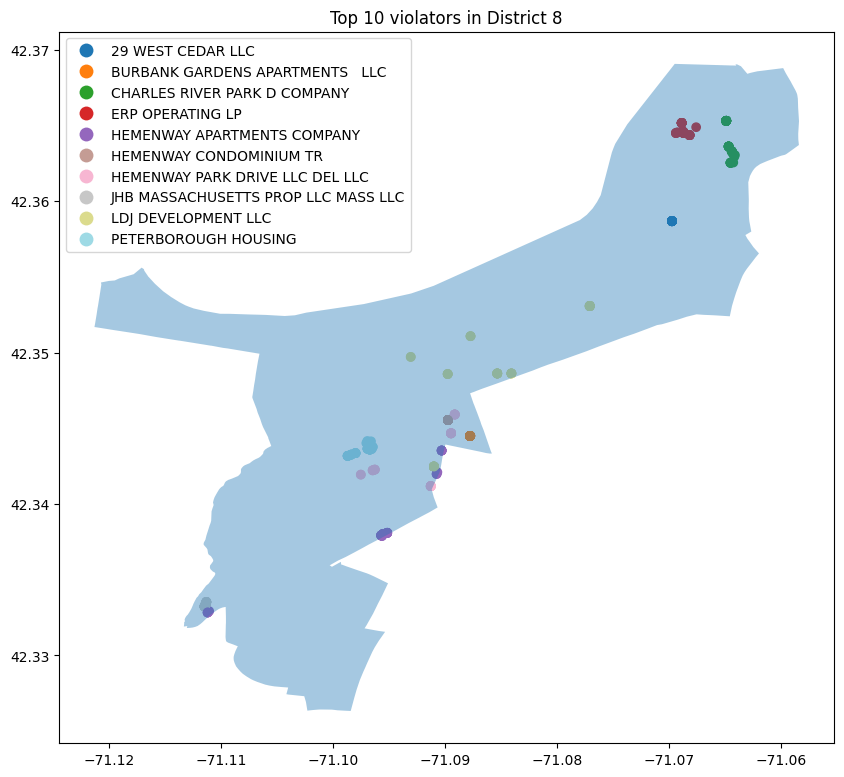

In [ ]:
#Plotting top 10 violators  
geometry = [Point(xy) for xy in zip(geo_district_8_filtered_owners['longitude'], geo_district_8_filtered_owners['latitude'])]

crs = {'init': 'epsg:4326'}

geo_district_8_own = gpd.GeoDataFrame(geo_district_8_filtered_owners, crs= crs, geometry = geometry)

fig,ax = plt.subplots(figsize = (10,10))

ax.set_title('Top 10 violators in District 8')

geo_district_8_own.plot(ax = ax,column = 'owner' , legend=True, cmap ='tab20' )

shape_8.plot(ax = ax,  alpha = 0.4)

### analysis of violations in other districts by the top 5 violators from district 8

In [ ]:
geo_except_district_8_owners = geo_exclude_district_8[geo_exclude_district_8['owner'].isin(['CHARLES RIVER PARK D COMPANY', 'LDJ DEVELOPMENT LLC', 
                                                                                            'BURBANK GARDENS APARTMENTS   LLC', 'HEMENWAY CONDOMINIUM TR', 
                                                                                            'ERP OPERATING LP'])]         

geo_except_district_8_owners

Empty GeoDataFrame
Columns: [date, violation_type, description, address, neighborhood, zip_code, parcel, owner, year built, year remodeled, property_type, latitude, longitude, geometry, intersect district 1, intersect district 2, intersect district 3, intersect district 4, intersect district 5, intersect district 6, intersect district 7, intersect district 8, intersect district 9]
Index: []

[0 rows x 23 columns]

# District 9
### violation descriptions

In [ ]:
top_10_type_violation_d9 = geo_district_9_filtered['description'].value_counts().nlargest(10)
top_10_type_violation_d9

Unsatisfactory Living Conditions    811
Pest Infestation - Residential      657
Heat - Excessive, Insufficient      469
Work w/out Permit                   371
Building Inspection Request         300
Contractors Complaint               268
Unsafe Dangerous Conditions         188
Working Beyond Hours                186
Electrical                          163
Mice Infestation - Residential      115
Name: description, dtype: int64

In [ ]:
#removing other descriptions
geo_district_9_filtered_violation = geo_district_9_filtered[geo_district_9_filtered['description'].isin([
    'Unsatisfactory Living Conditions', 'Pest Infestation - Residential',
    'Heat - Excessive, Insufficient', 'Work w/out Permit',
    'Building Inspection Request', 'Contractors Complaint',
    'Unsafe Dangerous Conditions', 'Working Beyond Hours',
    'Electrical', 'Mice Infestation - Residential'])]


<AxesSubplot: title={'center': 'Top 10 violation descriptions in District 9'}>

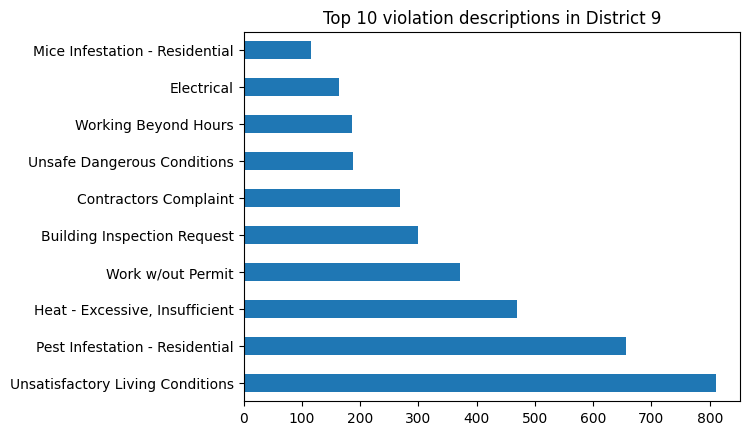

In [ ]:
top_10_type_violation_d9.plot(kind='barh', title = 'Top 10 violation descriptions in District 9')

C:\Users\SUEDA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<AxesSubplot: title={'center': 'Top 10 violation descriptions in District 9'}>

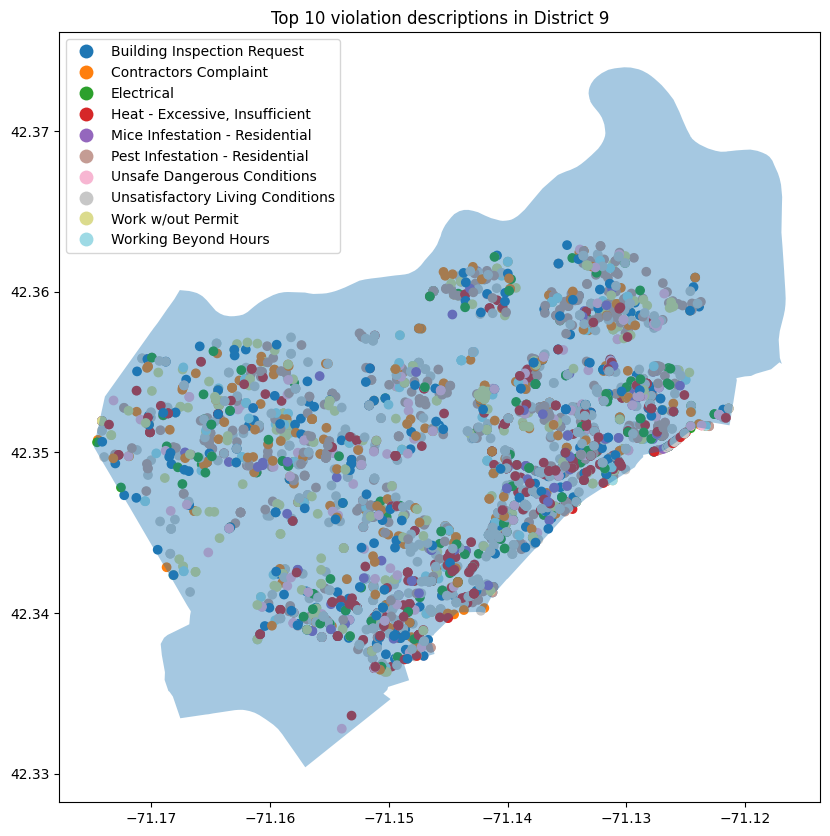

In [ ]:
geometry = [Point(xy) for xy in zip(geo_district_9_filtered_violation['longitude'], geo_district_9_filtered_violation['latitude'])]

crs = {'init': 'epsg:4326'}

geo_district_9 = gpd.GeoDataFrame(geo_district_9_filtered_violation, crs= crs, geometry = geometry)

fig,ax = plt.subplots(figsize = (10,10))

ax.set_title('Top 10 violation descriptions in District 9')

geo_district_9.plot(ax = ax ,column = 'description' , legend=True, cmap ='tab20')

shape_9.plot(ax = ax, alpha = 0.4)

### owner analysis

In [ ]:
top_10_type_owners_d9 = geo_district_9_filtered['owner'].value_counts().nlargest(10)
top_10_type_owners_d9

NORTHGATE CONDO TRUST             46
COMAVEN HOUSING ASSOC LPS         44
CUMMINGS ROAD LLC MASS LLC        40
COMMONWEALTH PROPERTIES           40
LONG-GLEN RENTAL LLC MASS LLC     38
RESERVOIR PLACE CONDO TR          33
COMMGLEN LLC                      33
LEO BIRMINGHAM NOMINEE TRUST      27
LONGFELLOW MANOR CONDO TR         25
COMMONWEALTH 1144 LPS MASS LPS    24
Name: owner, dtype: int64

In [ ]:
#removing other owners
geo_district_9_filtered_owners = geo_district_9_filtered[geo_district_9_filtered['owner'].isin([
    'NORTHGATE CONDO TRUST', 'COMAVEN HOUSING ASSOC LPS', 
    'COMMONWEALTH PROPERTIES', 'CUMMINGS ROAD LLC MASS LLC', 
    'LONG-GLEN RENTAL LLC MASS LLC ', 'RESERVOIR PLACE CONDO TR', 
    'COMMGLEN LLC', 'LEO BIRMINGHAM NOMINEE TRUST', 
    'LONGFELLOW MANOR CONDO TR', 'WASHOW LPS MASS LPS'])]

<AxesSubplot: title={'center': 'Top 10 violators in District 9'}>

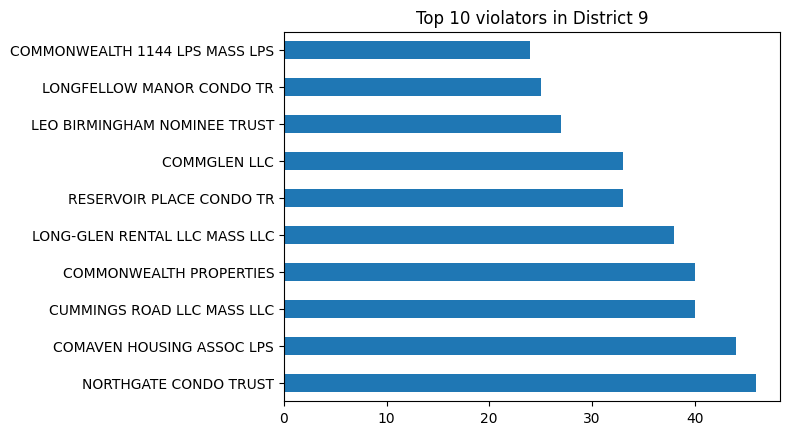

In [ ]:
top_10_type_owners_d9.plot(kind='barh', title = 'Top 10 violators in District 9')

C:\Users\SUEDA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<AxesSubplot: title={'center': 'Top 10 violators in District 9'}>

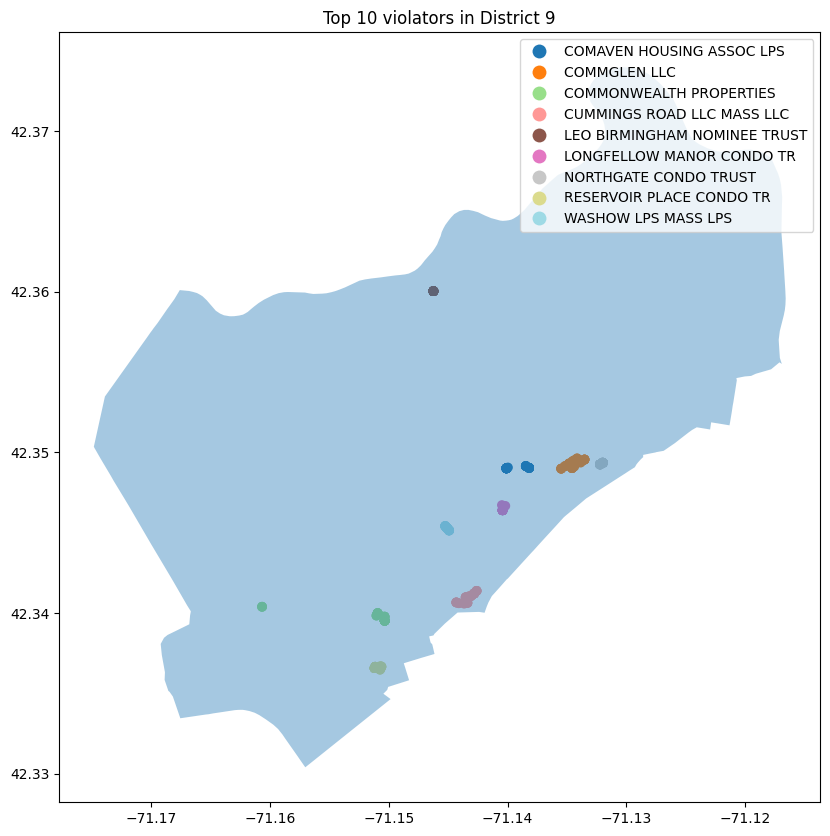

In [ ]:
#Plotting top 10 violators  
geometry = [Point(xy) for xy in zip(geo_district_9_filtered_owners['longitude'], geo_district_9_filtered_owners['latitude'])]

crs = {'init': 'epsg:4326'}

geo_district_9_own = gpd.GeoDataFrame(geo_district_9_filtered_owners, crs= crs, geometry = geometry)

fig,ax = plt.subplots(figsize = (10,10))

ax.set_title('Top 10 violators in District 9')

geo_district_9_own.plot(ax = ax,column = 'owner' , legend=True, cmap ='tab20' )

shape_9.plot(ax = ax,  alpha = 0.4)

### analysis of violations in other districts by the top 5 violators from district 9

In [ ]:
geo_except_district_9_owners = geo_exclude_district_9[geo_exclude_district_9['owner'].isin(['NORTHGATE CONDO TRUST', 'COMAVEN HOUSING ASSOC LPS', 
                                                                                            'COMMONWEALTH PROPERTIES', 'CUMMINGS ROAD LLC MASS LLC', 
                                                                                            'LONG-GLEN RENTAL LLC MASS LLC '])]


geo_except_district_9_owners

Empty GeoDataFrame
Columns: [date, violation_type, description, address, neighborhood, zip_code, parcel, owner, year built, year remodeled, property_type, latitude, longitude, geometry, intersect district 1, intersect district 2, intersect district 3, intersect district 4, intersect district 5, intersect district 6, intersect district 7, intersect district 8, intersect district 9]
Index: []

[0 rows x 23 columns]

the owners do not have properties in other districts

# Overall Summary

In [ ]:
top_10_type_violation_all = geo_all['description'].value_counts().nlargest(10)
top_10_type_violation_all

Unsatisfactory Living Conditions    8898
Work w/out Permit                   5844
Contractors Complaint               5109
Pest Infestation - Residential      4234
Heat - Excessive, Insufficient      3586
Building Inspection Request         3495
Unsafe Dangerous Conditions         3135
Working Beyond Hours                2860
Electrical                          1745
Protection of Adjoining Property    1579
Name: description, dtype: int64

In [ ]:
#filtering out 
geo_all_filtered_violation = geo_all[geo_all['description'].isin(
    ['Unsatisfactory Living Conditions', 'Work w/out Permit', 
     'Contractors Complaint','Pest Infestation - Residential', 
     'Heat - Excessive, Insufficient', 'Building Inspection Request'
     'Unsafe Dangerous Conditions', 'Working Beyond Hours',
     'Electrical','Protection of Adjoining Property'])]


<AxesSubplot: title={'center': 'Top 10 violation descriptions in Boston'}>

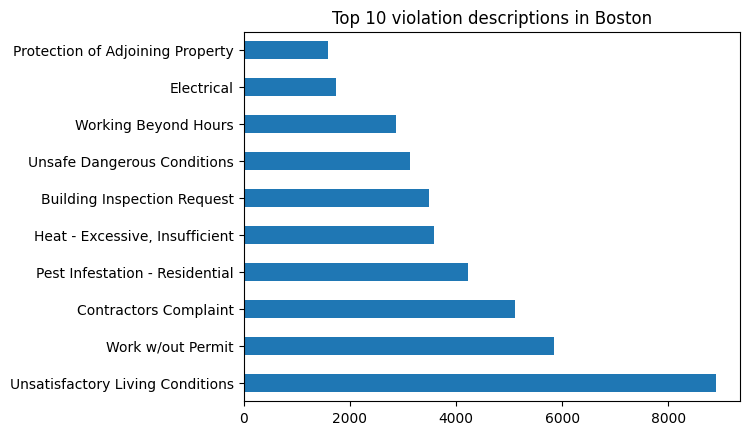

In [ ]:
top_10_type_violation_all.plot(kind='barh', title = 'Top 10 violation descriptions in Boston')

C:\Users\SUEDA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<AxesSubplot: title={'center': 'Top 10 violation descriptions in Boston'}>

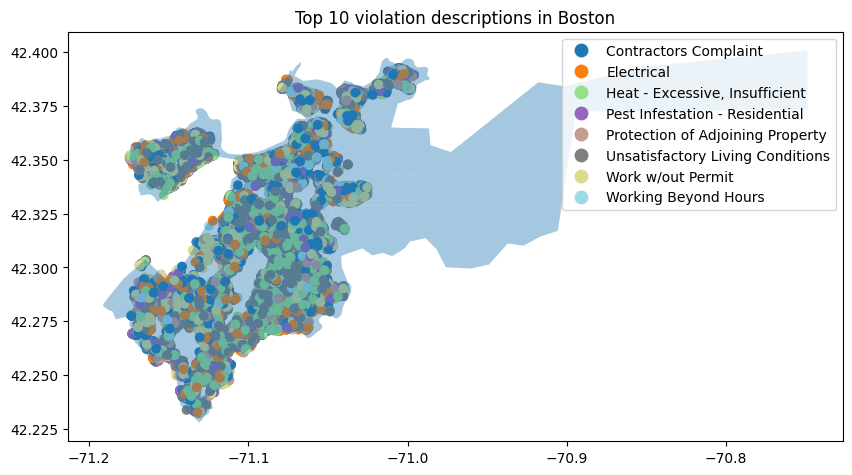

In [ ]:
geometry = [Point(xy) for xy in zip(geo_all_filtered_violation['longitude'], geo_all_filtered_violation['latitude'])]

crs = {'init': 'epsg:4326'}

geo_all_districts_violations = gpd.GeoDataFrame(geo_all_filtered_violation, crs= crs, geometry = geometry)

fig,ax = plt.subplots(figsize = (10,10))

ax.set_title('Top 10 violation descriptions in Boston')

geo_all_districts_violations.plot(ax = ax ,column = 'description' , legend=True, cmap ='tab20')

shap.plot(ax = ax, alpha = 0.4)

In [ ]:
top_10_type_owners_all = geo_all['owner'].value_counts().nlargest(10)
top_10_type_owners_all

GBM PORTFOLIO OWNER LLC               371
NORTHAMPTON SQ CONDO ASSOC            167
KASANOF LAND LLC                      146
JPNDC  PITTS  LLC                     106
CESCO LLC MASS LLC                    105
GEORGETOWNE HOMES ONE LLC MASS LLC    102
SOLSKINN PROPERTIES LLC                96
HARBOR POINT APTS CO LESSEE            83
MERCANTILE WHARF ASSOCIATES            81
BISMARCK STREET OWNER LLC              80
Name: owner, dtype: int64

In [ ]:
#filtering out 
geo_all_filtered_owner = geo_all[geo_all['owner'].isin(
    ['GBM PORTFOLIO OWNER LLC', 'NORTHAMPTON SQ CONDO ASSOC', 
     'KASANOF LAND LLC','JPNDC  PITTS  LLC', 
     'CESCO LLC MASS LLC', 'GEORGETOWNE HOMES ONE LLC MASS LLC'
     'SOLSKINN PROPERTIES LLC', 'HARBOR POINT APTS CO LESSEE',
     'MERCANTILE WHARF ASSOCIATES','BISMARCK STREET OWNER LLC'])]


<AxesSubplot: title={'center': 'Top 10 violators in Boston'}>

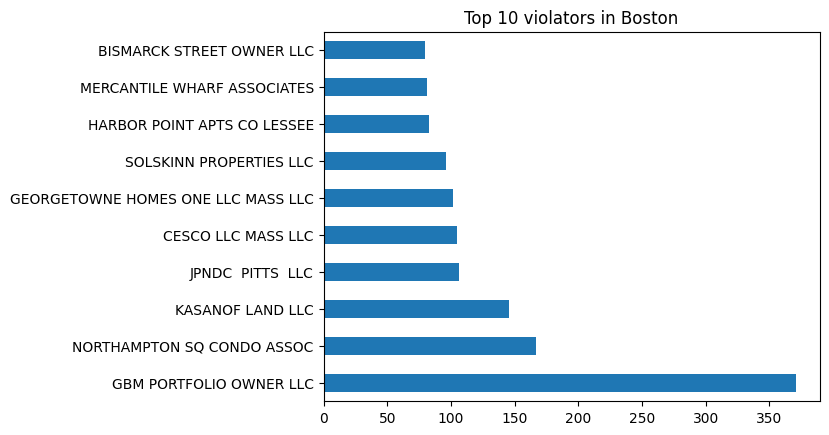

In [ ]:
top_10_type_owners_all.plot(kind='barh', title = 'Top 10 violators in Boston')

C:\Users\SUEDA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<AxesSubplot: title={'center': 'Top 10 violators in Boston'}>

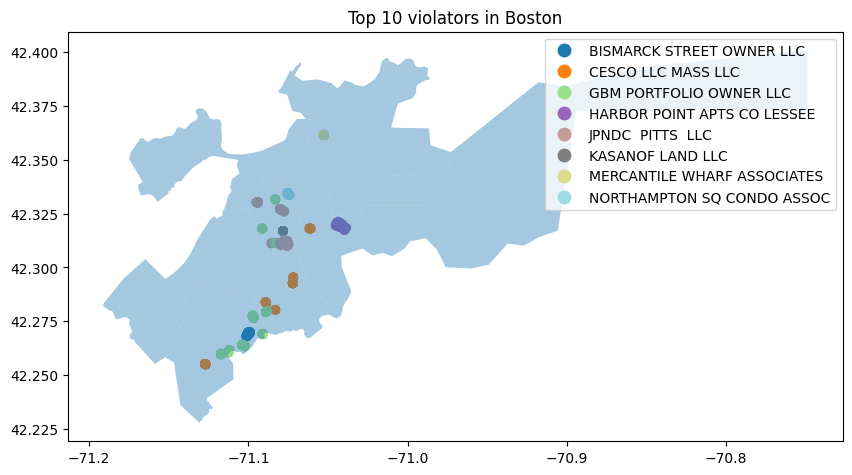

In [ ]:
#Plotting top 10 violators  
geometry = [Point(xy) for xy in zip(geo_all_filtered_owner['longitude'], geo_all_filtered_owner['latitude'])]

crs = {'init': 'epsg:4326'}

geo_all_districts_own = gpd.GeoDataFrame(geo_all_filtered_owner, crs= crs, geometry = geometry)

fig,ax = plt.subplots(figsize = (10,10))

ax.set_title('Top 10 violators in Boston')

geo_all_districts_own.plot(ax = ax,column = 'owner' , legend=True, cmap ='tab20' )

shap.plot(ax = ax,  alpha = 0.4)